In [1]:
from carla_disentanglement.datasets.shapes import Shapes3DDataset
import numpy as np
from models.annealed_vae import AnnealedVAE
from models.beta_tcvae import BetaTCVAE
from models.beta_vae import BetaVAE
from models.info_vae import InfoVAE
from architectures.SimpleConv64 import *
from architectures.Conv64 import *
from architectures.ResConv import *
from architectures.ResConv64 import *
import torch

In [2]:
seed = 2
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [3]:
ds = Shapes3DDataset()# uses about 8GB of RAM

In [4]:
z_dim = 10
num_channels = 3
image_size = 64

In [5]:
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=2)
# vae = AnnealedVAE(SimpleGaussianConv64(z_dim, num_channels, image_size), SimpleConv64Decoder(z_dim, num_channels, image_size), beta=50.0, max_c=20, iterations_c=4)
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')
# vae = AnnealedVAE(Encoder(num_channels, z_dim, , image_size), Decoder(z_dim, num_channels, image_size), beta=100.0, max_c=20, iterations_c=8, reconstruction='mse')
# vae = BetaTCVAE(SimpleGaussianConv64(z_dim, num_channels, image_size), SimpleConv64Decoder(z_dim, num_channels, image_size), beta=10.0, reconstruction='mse')

vae = AnnealedVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')
# vae = BetaVAE(GaussianResConv64(z_dim, num_channels, image_size), ResConv64Decoder(z_dim, num_channels, image_size))
# vae = BetaVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size))
# vae = AnnealedVAE(GaussianConv64(z_dim, num_channels, image_size), Conv64Decoder(z_dim, num_channels, image_size), gamma=100.0, max_c=20, iterations_c=1e5, reconstruction='bce')

cuda


In [6]:
def display_image(image):
    display(image, metadata={'width': '100%'})

import matplotlib.pyplot as plt
import numpy as np

stats = {
    'losses': [[0,0]],
    'eval_losses': [],
    'eval_scores': []
}

def addLoss(losses):
    stats['losses'] = losses

def addEval(eval_losses, eval_scores, eval_step = 1):
    stats['eval_losses'] = eval_losses
    stats['eval_scores'] = eval_scores

    fig, axs = plt.subplots(2, 3, figsize=(20,15))
    data = np.array(stats['losses'])
    eval_data = np.array(eval_losses)
    axs[0, 0].plot(range(len(data)), data[:,1], label='train recon loss')
    axs[0, 0].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,1], label='test recon loss')
    axs[0, 0].legend()

    axs[0, 1].plot(range(len(data)), data[:,2], label='train kl loss')
    axs[0, 1].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,2], label='test kl loss')
    axs[0, 1].legend()

    axs[0, 2].plot(range(len(data)), data[:,0], label='train loss')
    axs[0, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,0], label='test loss')
    axs[0, 2].legend()

    score_data = np.array(eval_scores)
    axs[1, 0].plot(score_data[:,0], label='beta-vae-score train')
    axs[1, 0].plot(score_data[:,1], label='beta-vae-score test')
    axs[1, 0].legend()

    # axs[1, 2].plot(range(len(data)), data[:,3], label='train tc loss')
    # axs[1, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,3], label='test tc loss')
    # axs[1, 2].legend()


    plt.show()

In [7]:
vae.initOptimizer(lr=5e-4) #, betas=(0.9,0.999)

  0%|          | 0/40 [03:07<?, ?it/s, epoch_stat=0, global_iter=5625, kl_loss=604, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4764.98]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERG

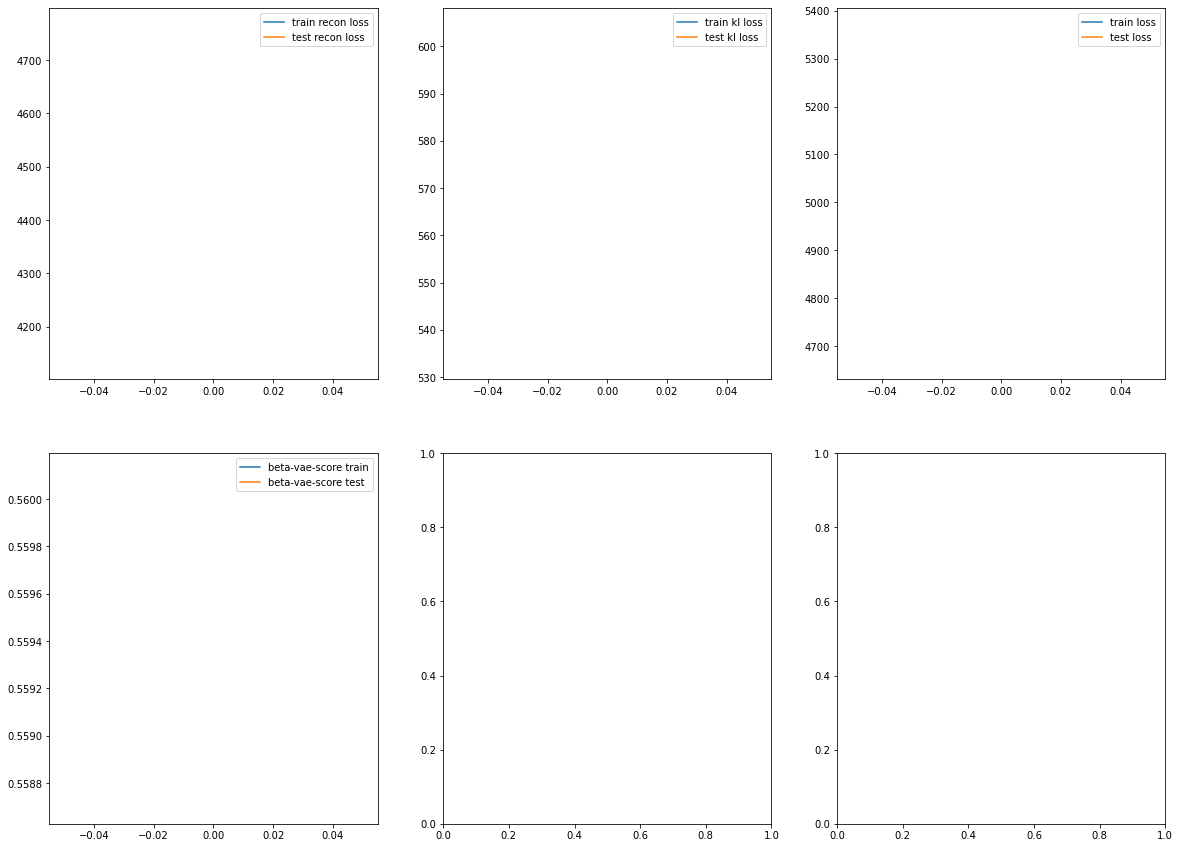

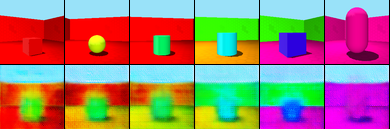

  2%|▎         | 1/40 [06:44<2:24:45, 222.70s/it, epoch_stat=1, global_iter=11250, kl_loss=526, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4.33e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SO

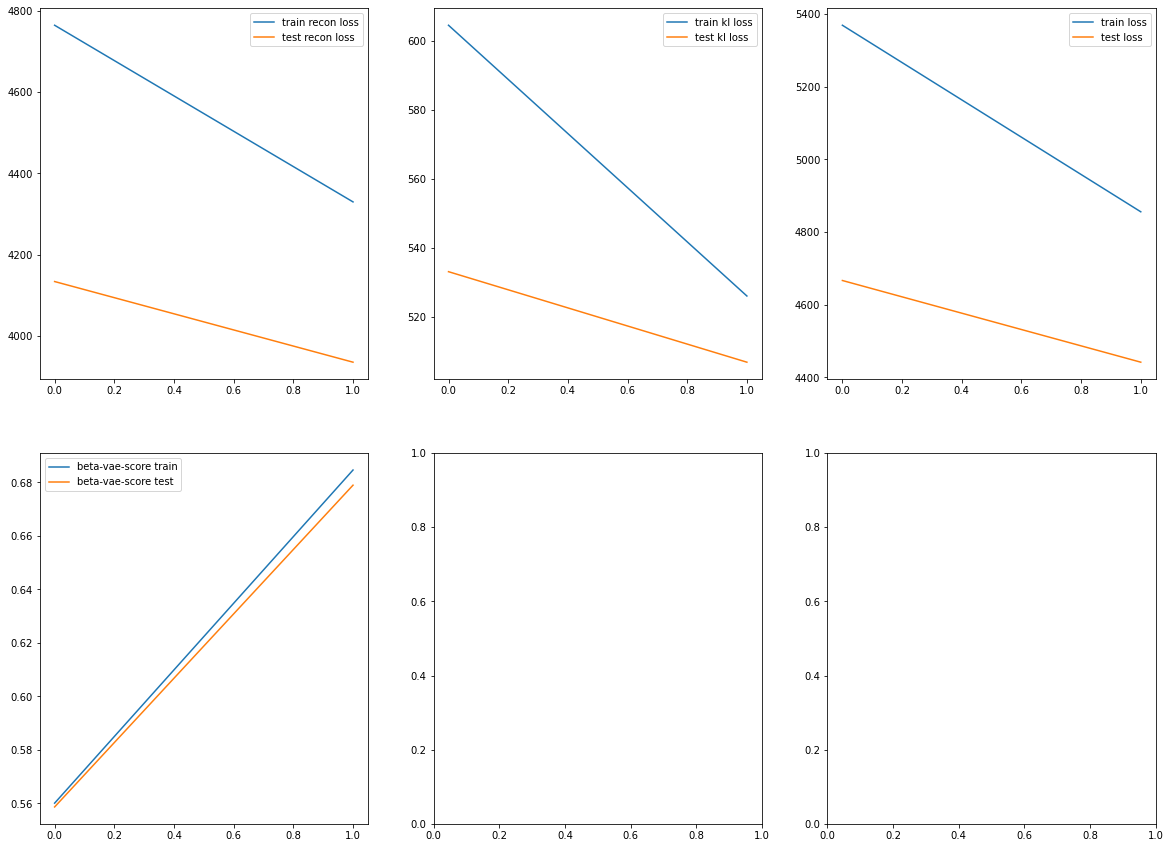

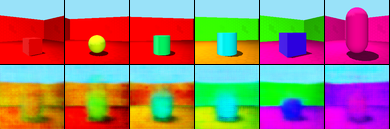

  5%|▌         | 2/40 [10:20<2:19:45, 220.67s/it, epoch_stat=2, global_iter=16875, kl_loss=471, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4.19e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SO

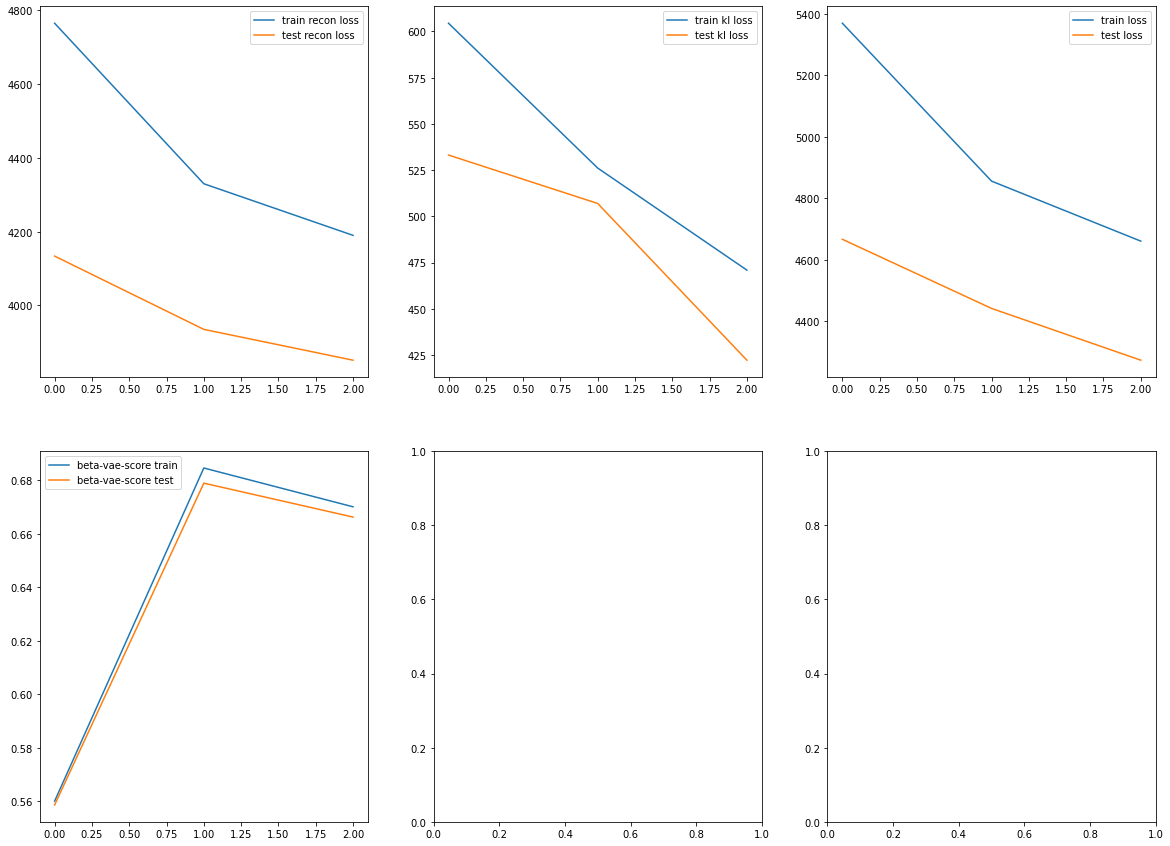

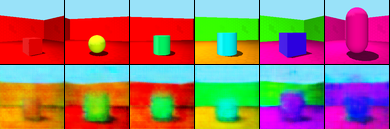

  8%|▊         | 3/40 [13:57<2:15:17, 219.40s/it, epoch_stat=3, global_iter=22500, kl_loss=381, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4121.62]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SO

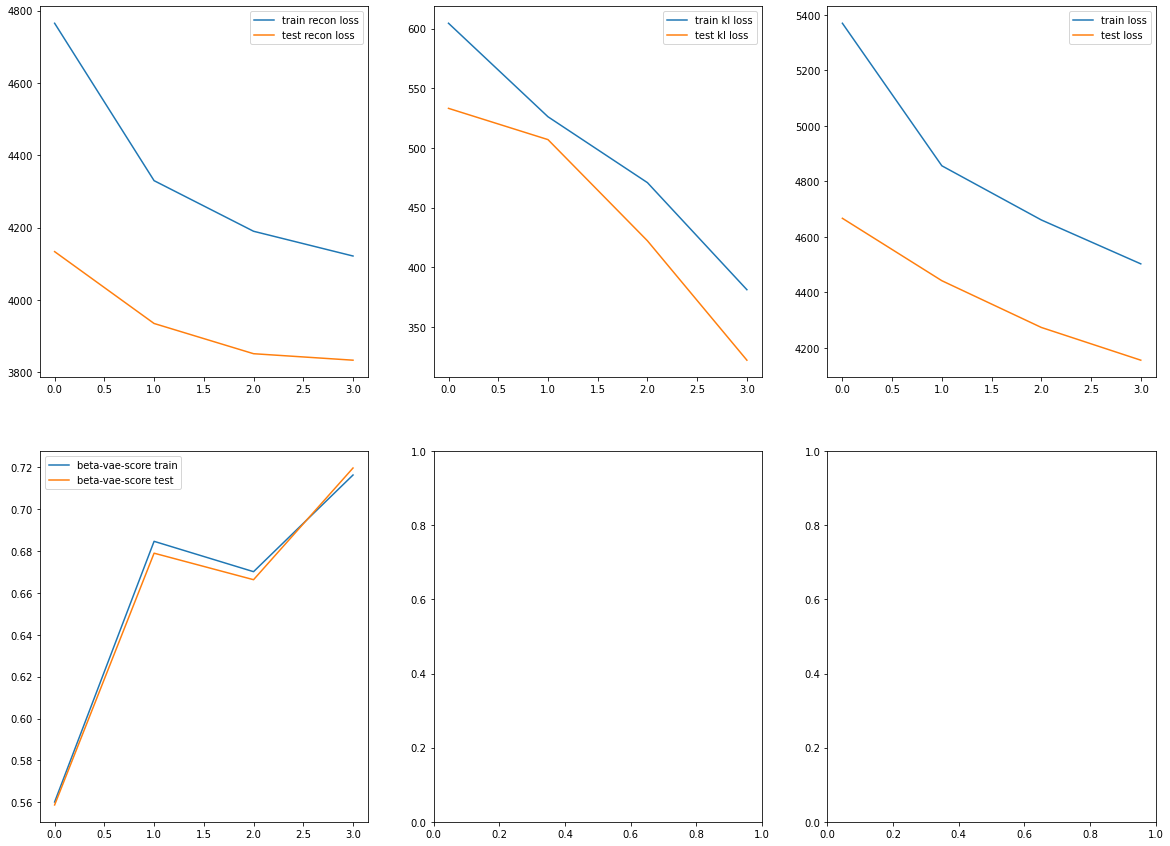

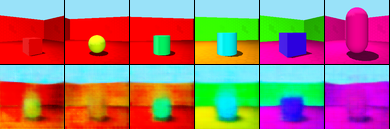

 10%|█         | 4/40 [17:45<2:11:26, 219.06s/it, epoch_stat=4, global_iter=28125, kl_loss=280, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4.08e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SO

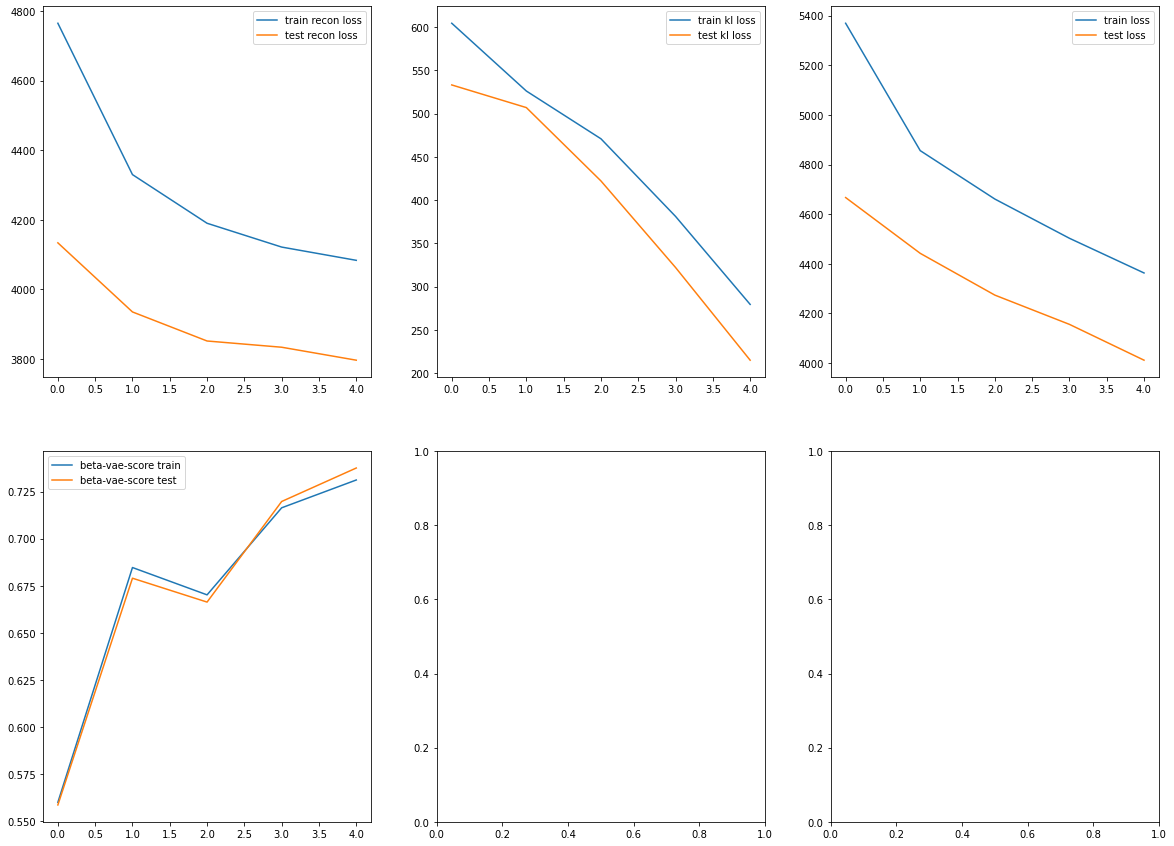

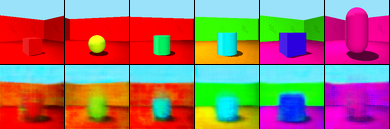

 12%|█▎        | 5/40 [21:21<2:09:08, 221.39s/it, epoch_stat=5, global_iter=33750, kl_loss=174, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4058.26]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SO

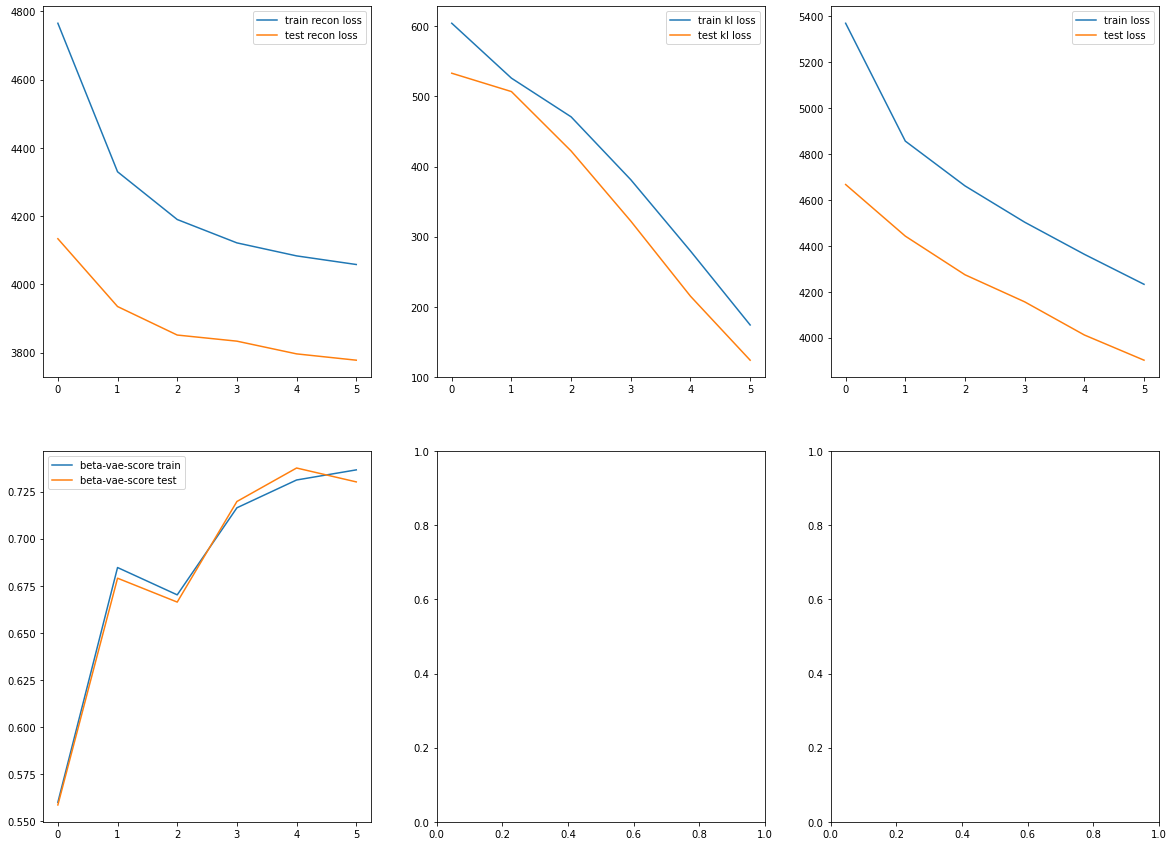

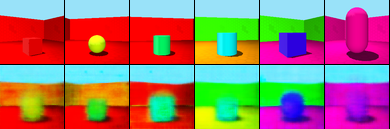

 15%|█▌        | 6/40 [24:58<2:04:25, 219.58s/it, epoch_stat=6, global_iter=39375, kl_loss=71.4, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=4.03e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_S

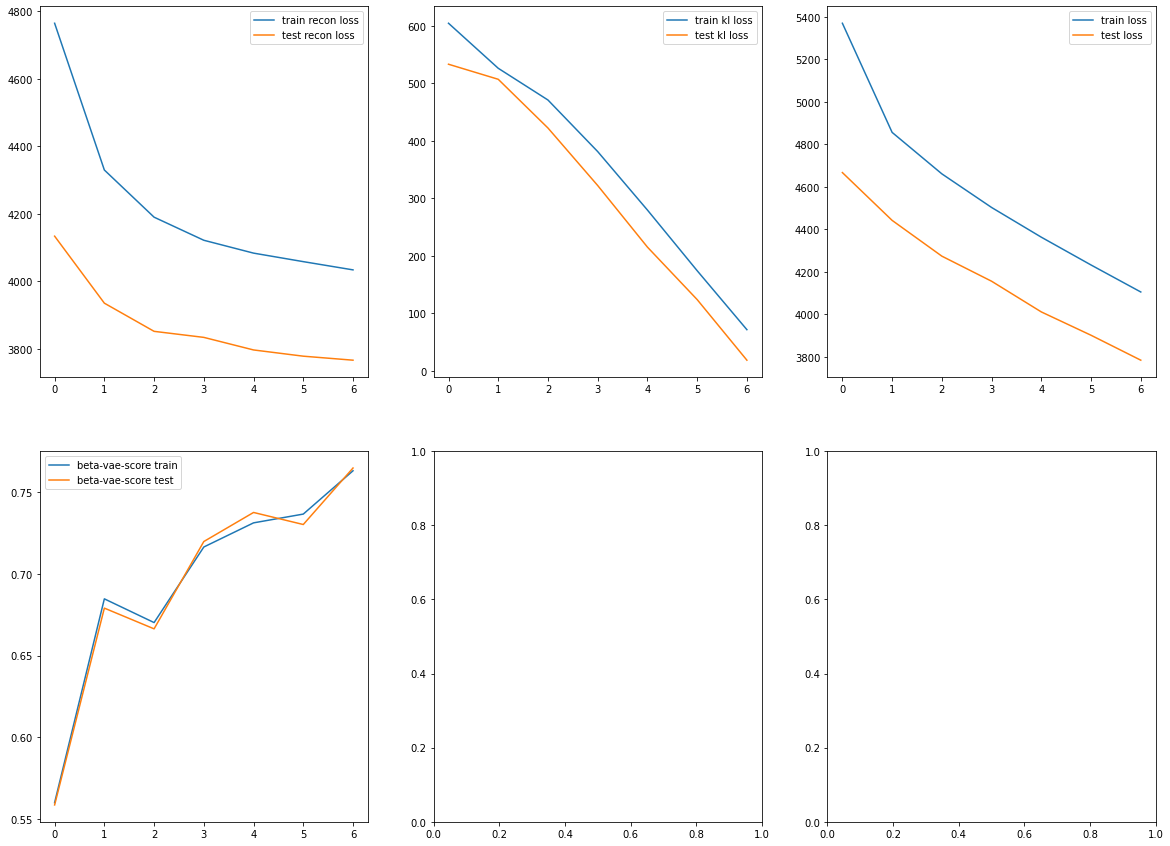

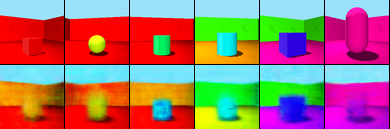

 18%|█▊        | 7/40 [28:34<2:00:20, 218.79s/it, epoch_stat=7, global_iter=45000, kl_loss=31.7, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.96e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_S

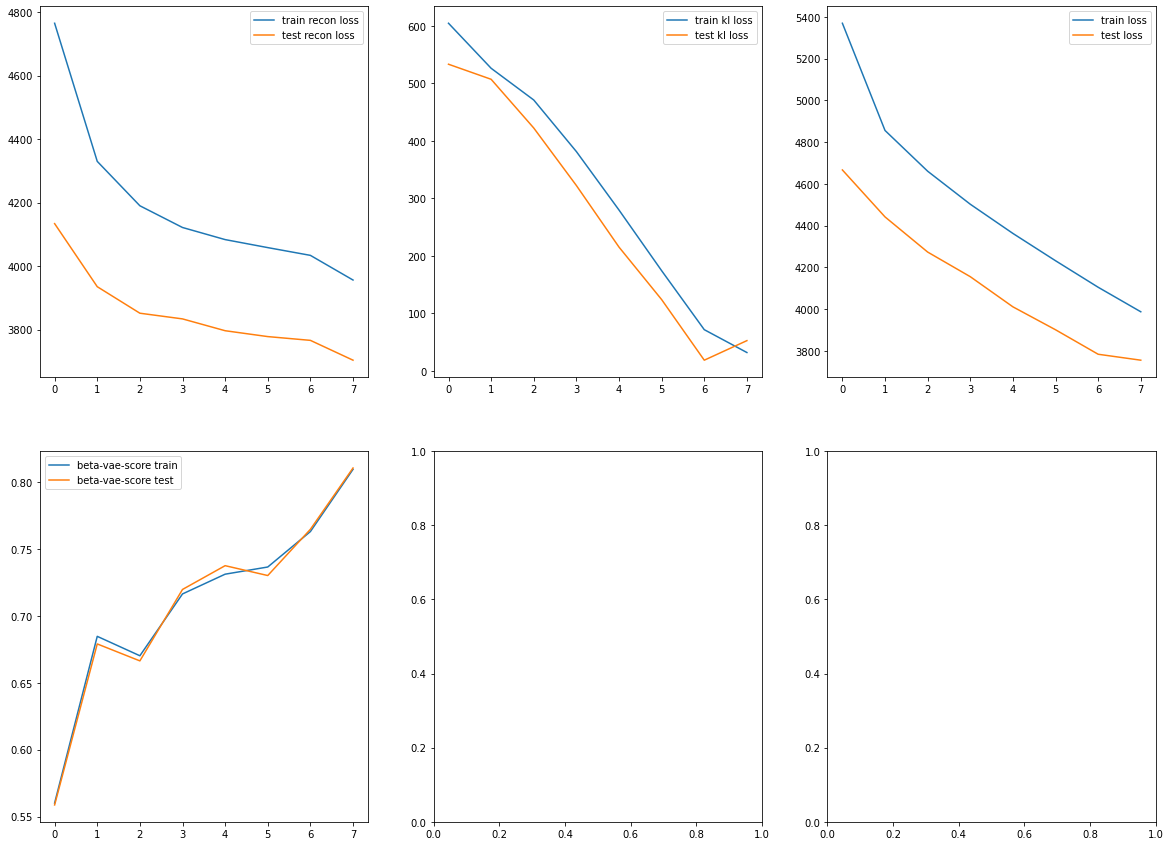

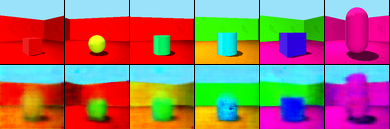

 20%|██        | 8/40 [32:10<1:56:18, 218.07s/it, epoch_stat=8, global_iter=50625, kl_loss=20.6, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.87e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_S

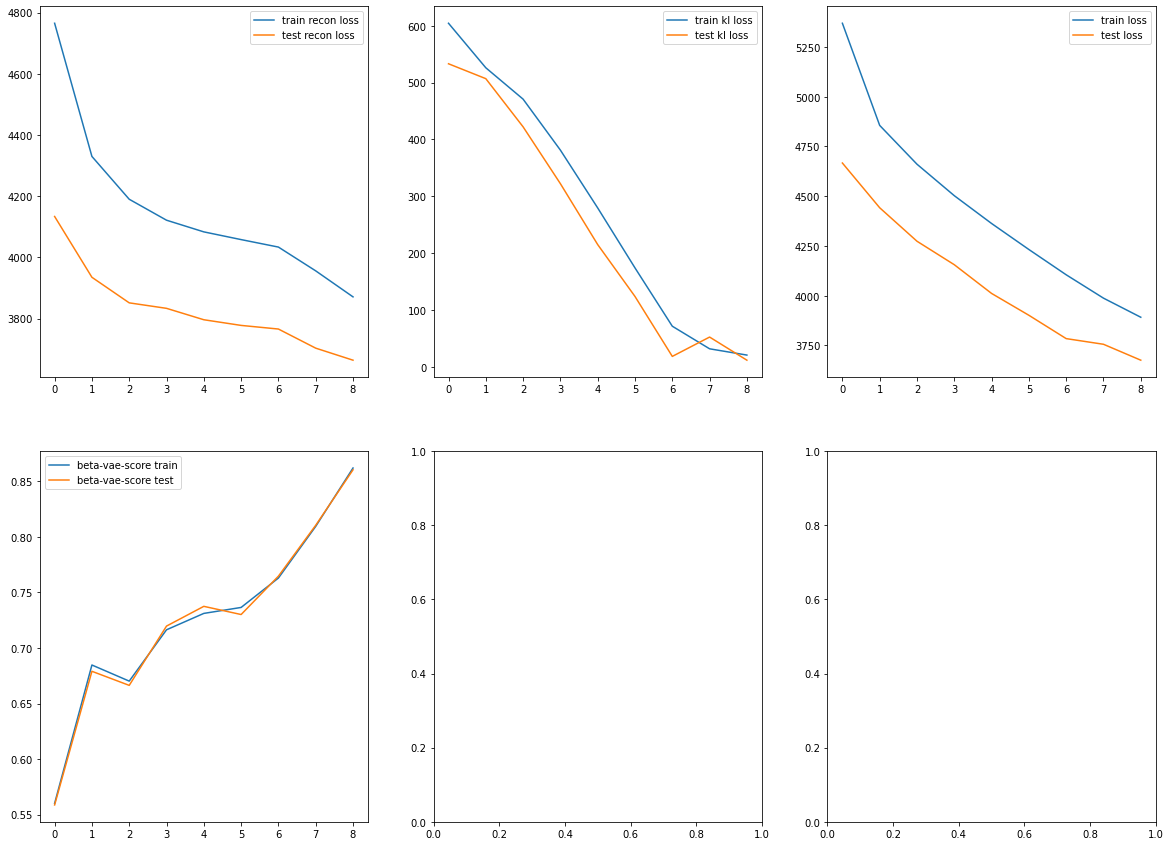

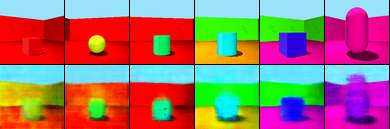

 22%|██▎       | 9/40 [35:45<1:52:17, 217.32s/it, epoch_stat=9, global_iter=56250, kl_loss=14.8, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.8e+3] C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_S

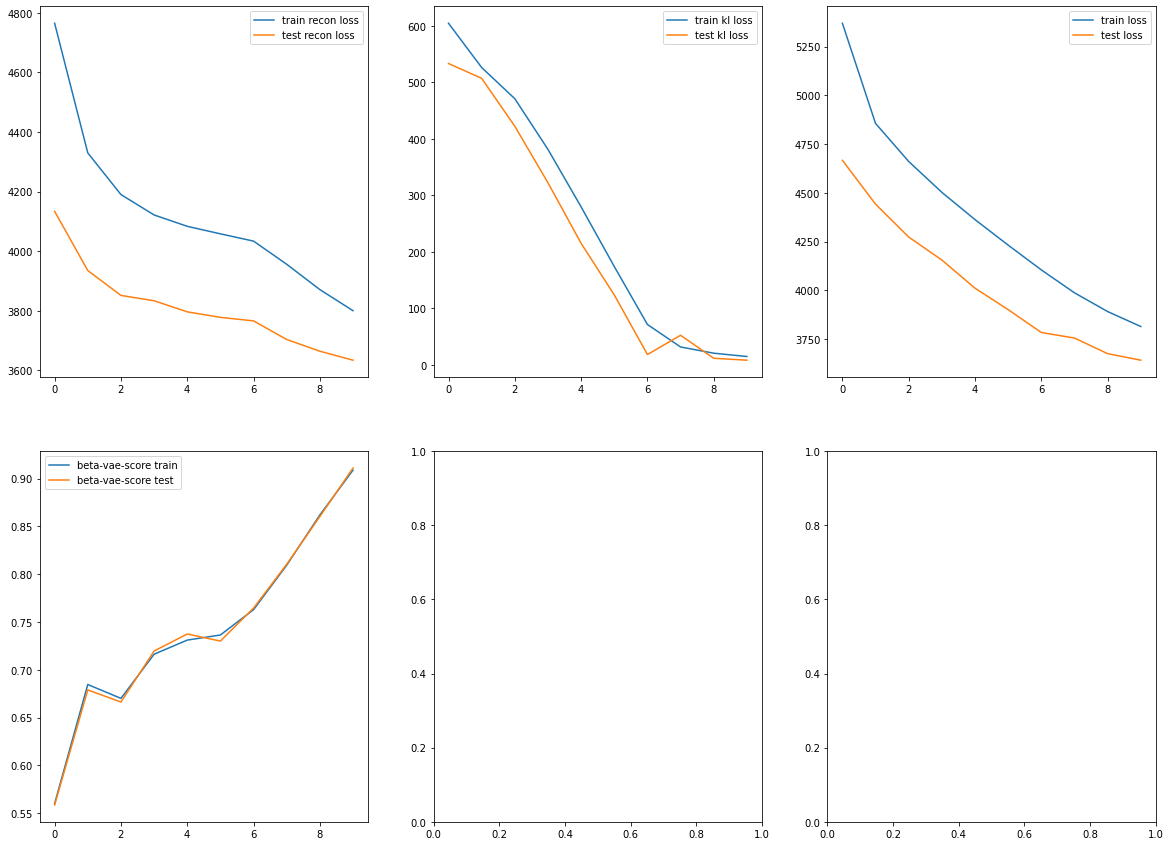

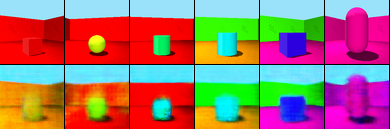

 25%|██▌       | 10/40 [39:19<1:48:15, 216.52s/it, epoch_stat=10, global_iter=61875, kl_loss=12.8, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.74e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

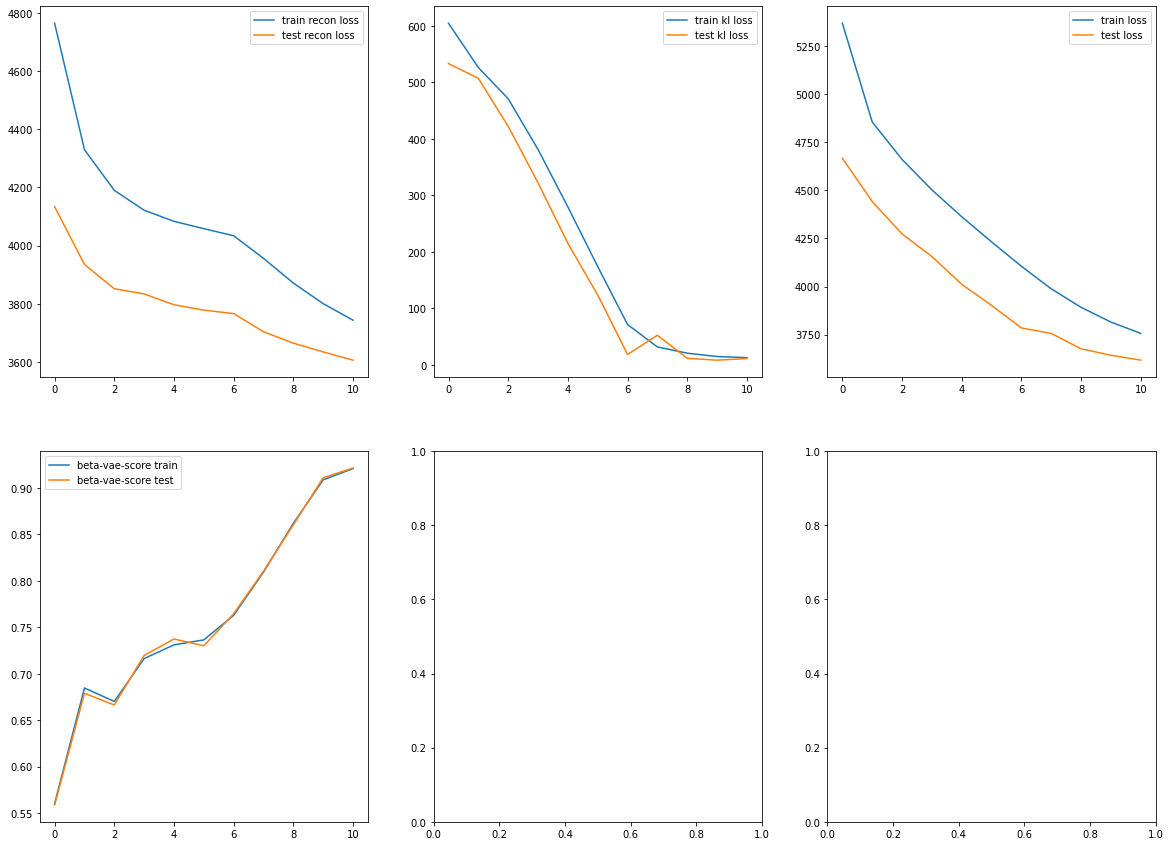

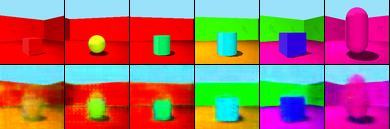

 28%|██▊       | 11/40 [42:54<1:44:23, 215.99s/it, epoch_stat=11, global_iter=67500, kl_loss=11.6, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.7e+3] C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

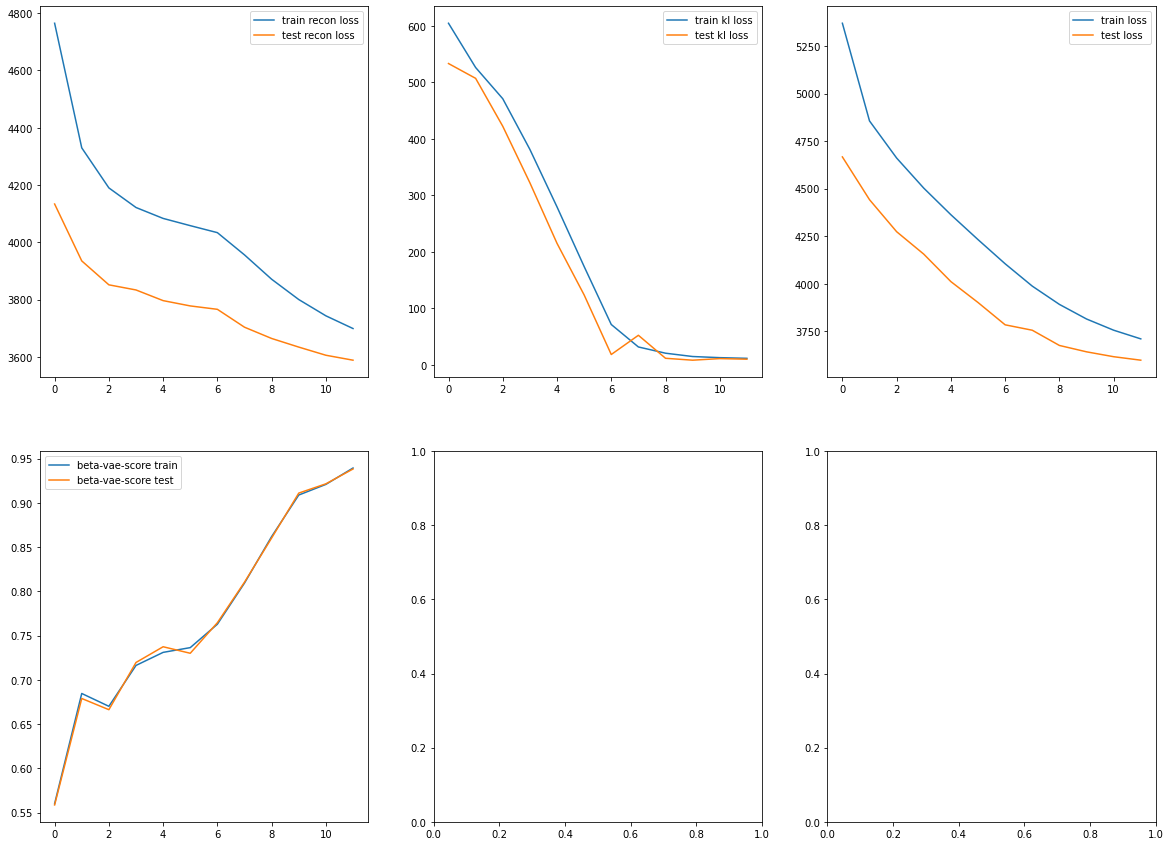

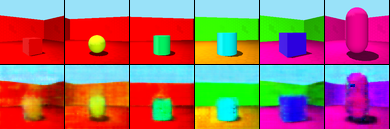

 30%|███       | 12/40 [46:29<1:40:37, 215.61s/it, epoch_stat=12, global_iter=73125, kl_loss=10.7, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.66e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

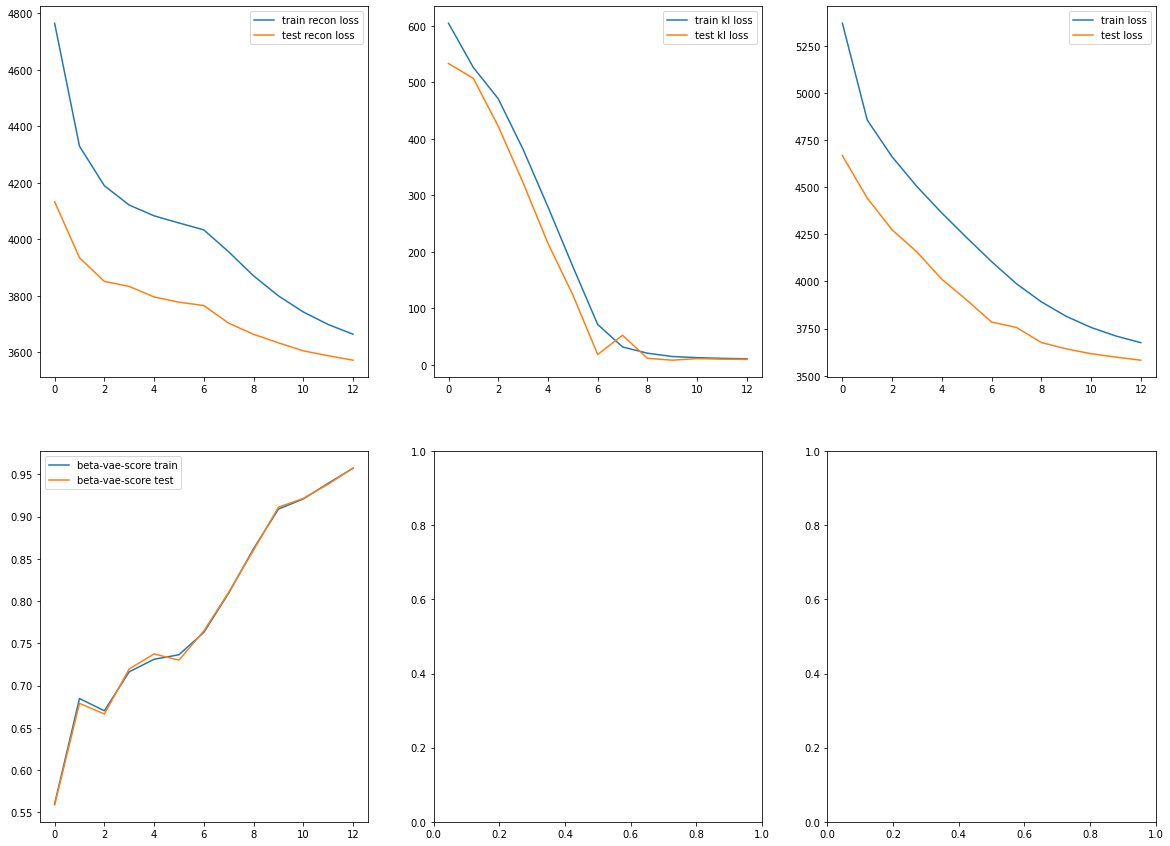

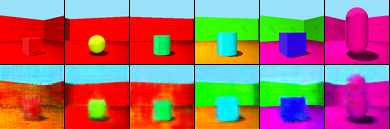

 32%|███▎      | 13/40 [50:04<1:36:53, 215.33s/it, epoch_stat=13, global_iter=78750, kl_loss=10.8, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.64e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

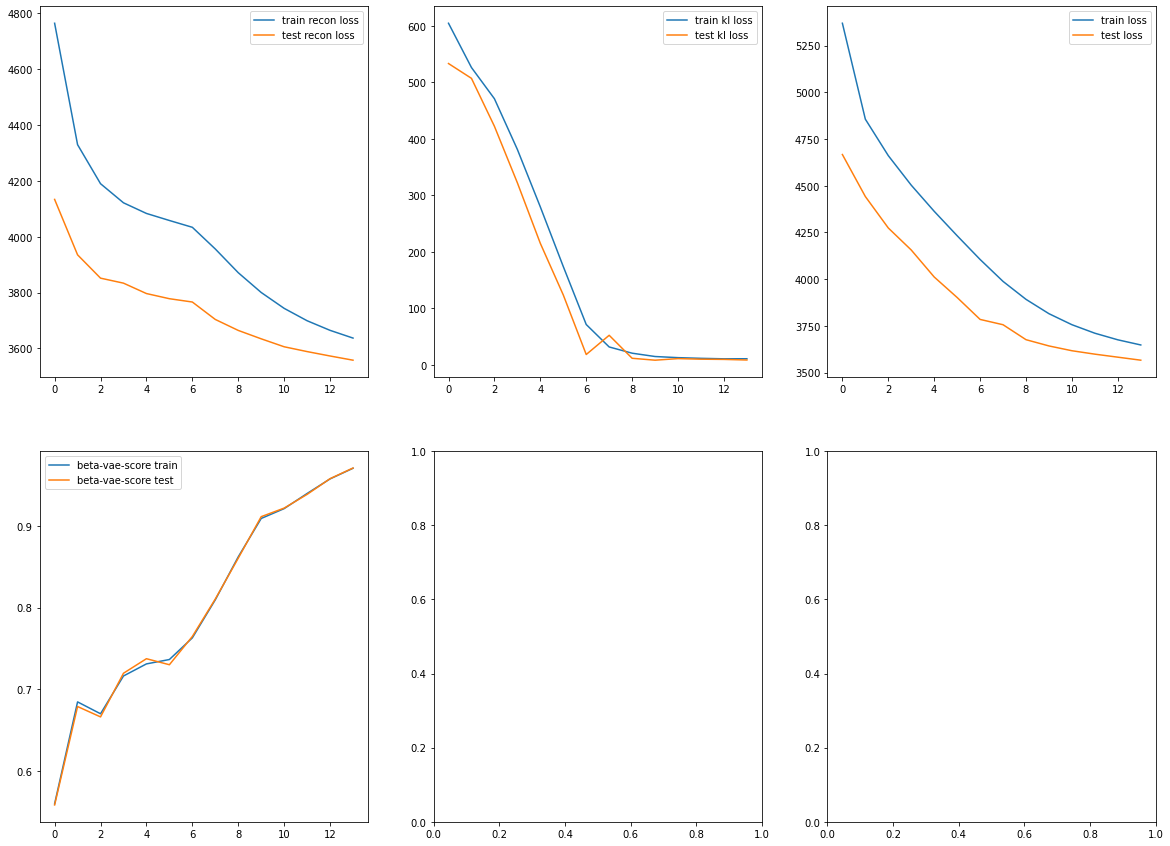

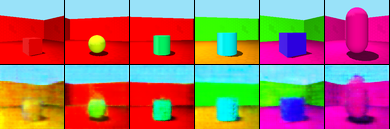

 35%|███▌      | 14/40 [53:40<1:33:23, 215.51s/it, epoch_stat=14, global_iter=84375, kl_loss=10.6, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.62e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

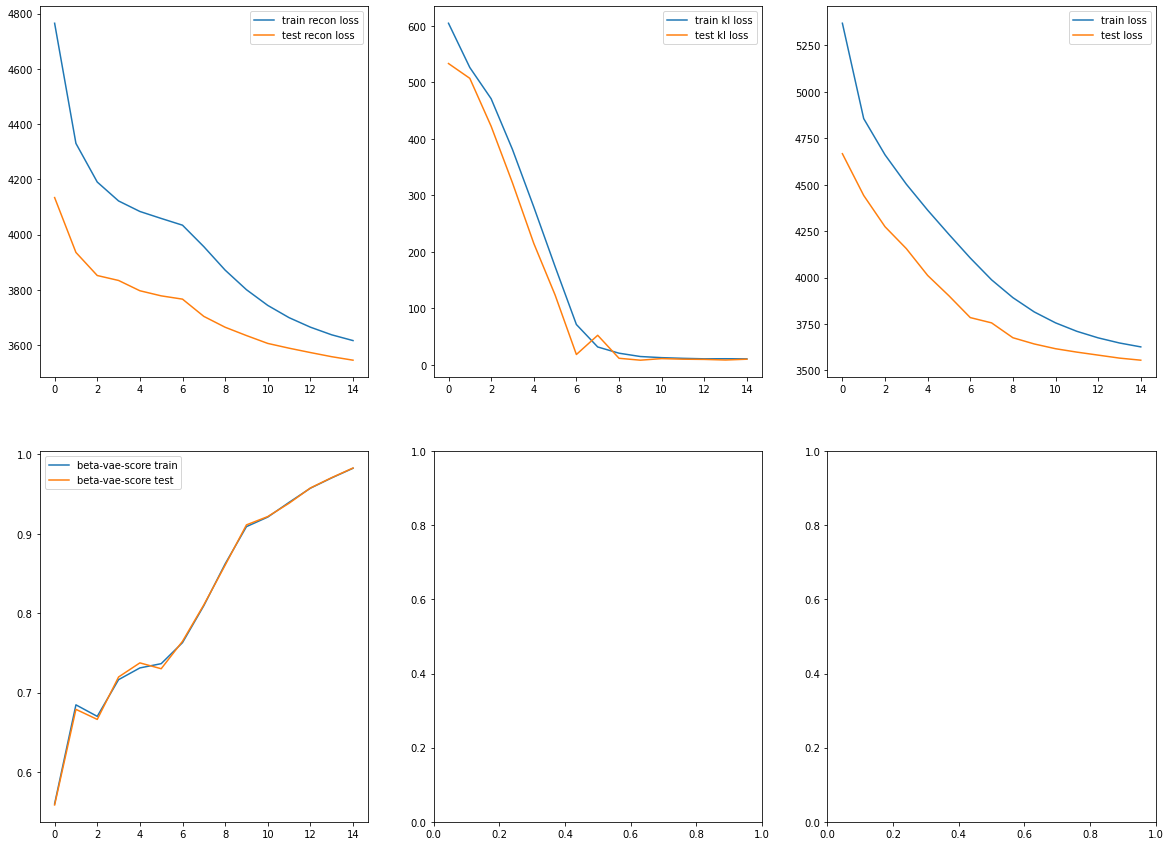

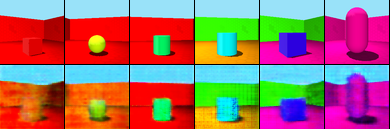

 38%|███▊      | 15/40 [57:16<1:29:50, 215.63s/it, epoch_stat=15, global_iter=9e+4, kl_loss=10.5, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.6e+3]  C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

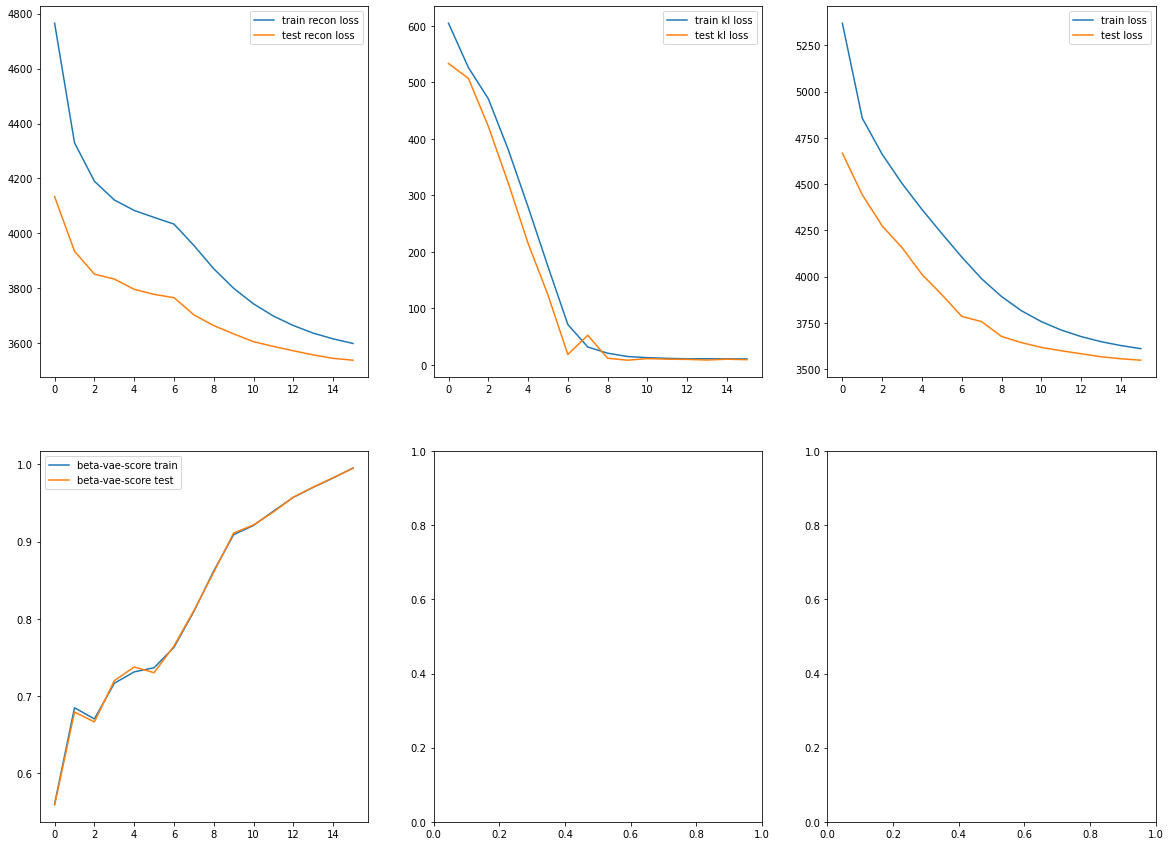

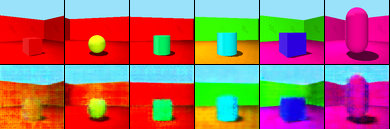

 40%|████      | 16/40 [1:00:49<1:26:21, 215.91s/it, epoch_stat=16, global_iter=95625, kl_loss=10.1, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.59e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIST

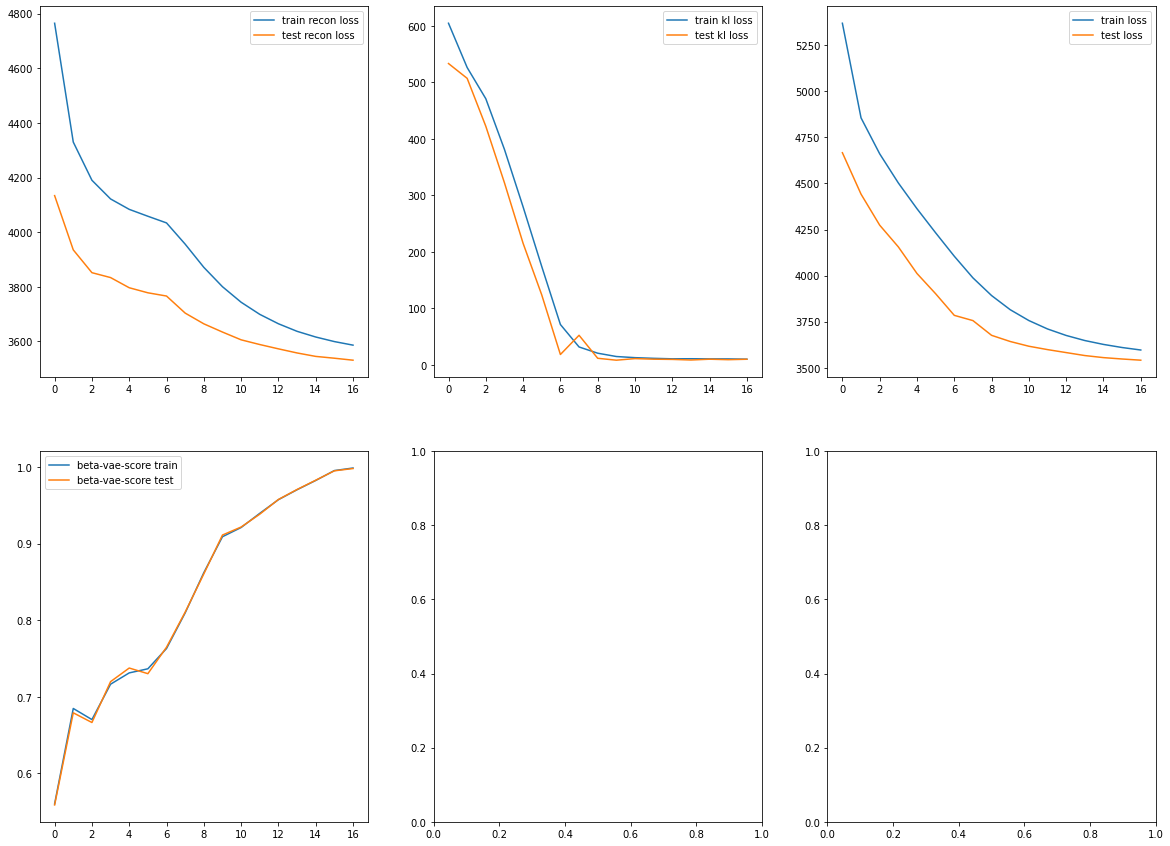

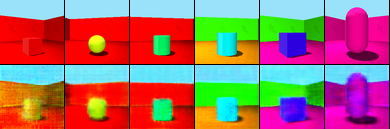

 42%|████▎     | 17/40 [1:04:20<1:22:17, 214.69s/it, epoch_stat=17, global_iter=101250, kl_loss=10.4, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.58e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

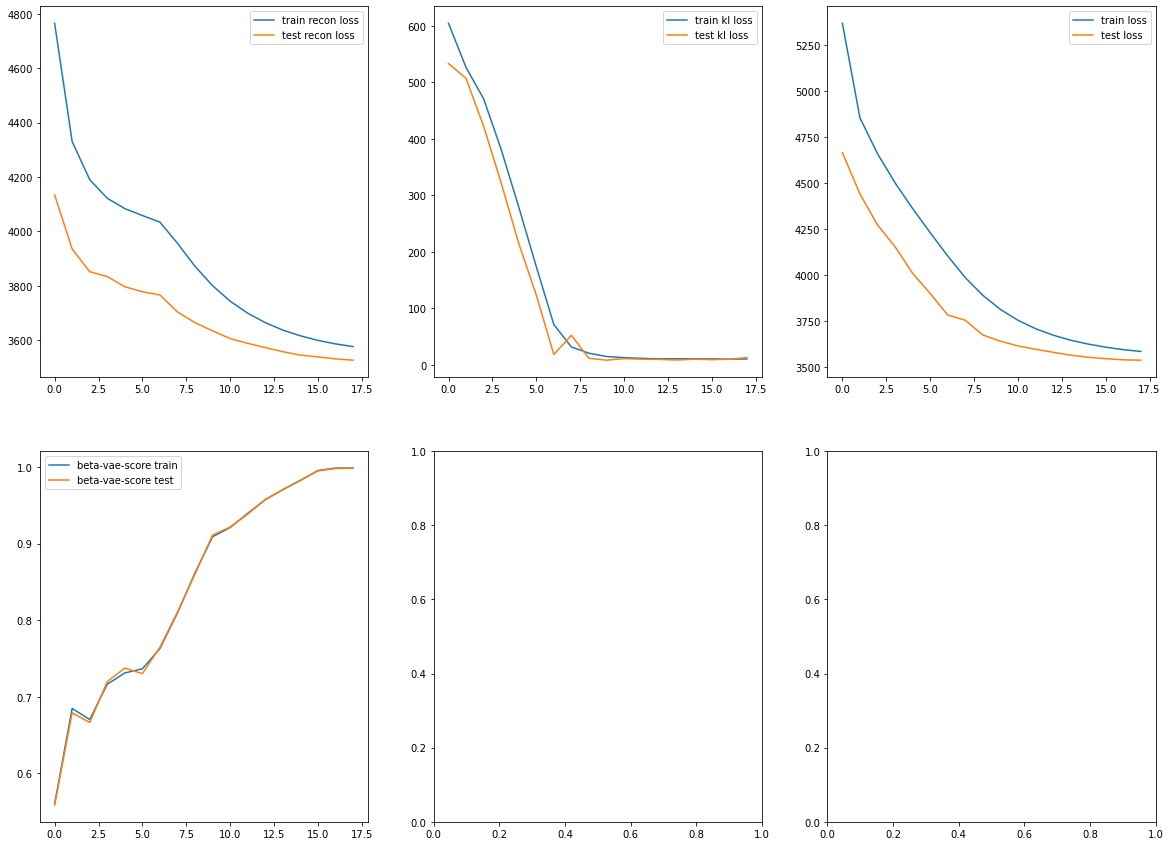

 45%|████▌     | 18/40 [1:07:51<1:18:23, 213.79s/it, epoch_stat=18, global_iter=106875, kl_loss=9.9, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.57e+3] C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

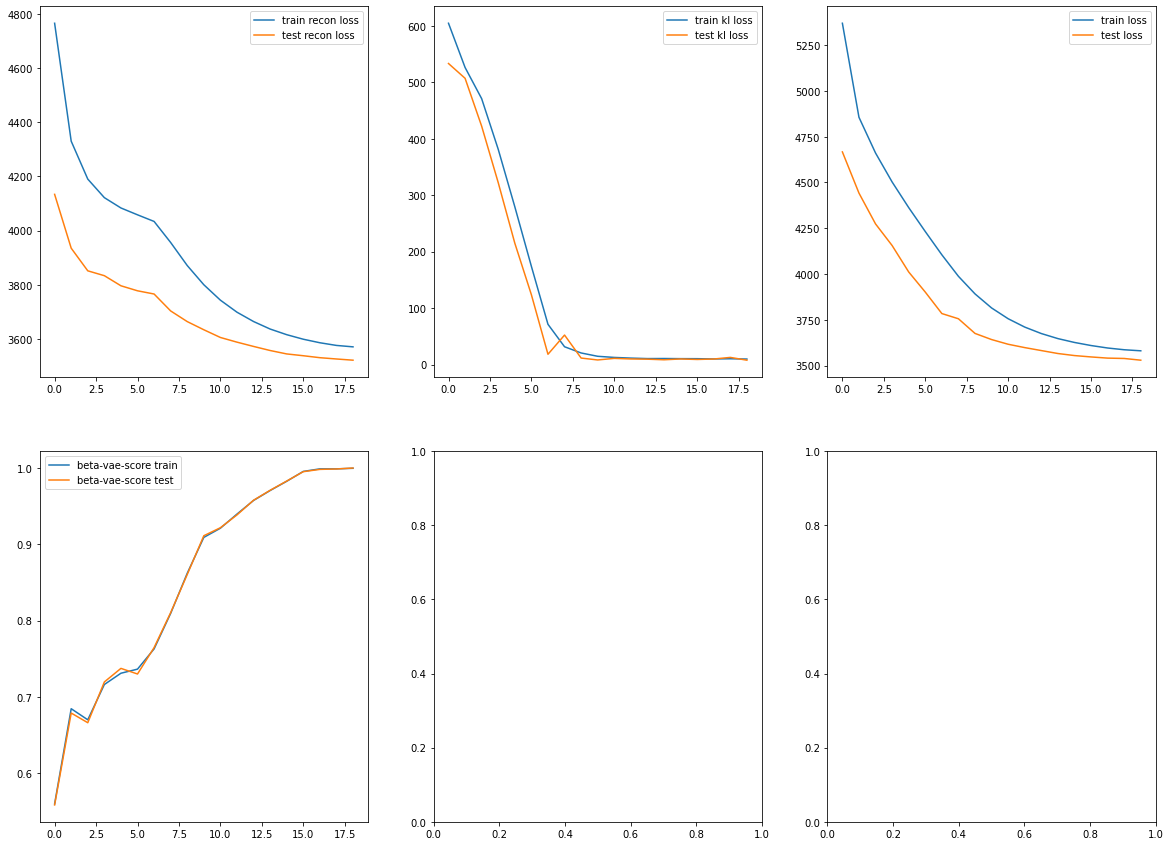

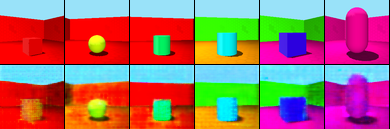

 48%|████▊     | 19/40 [1:11:21<1:14:22, 212.48s/it, epoch_stat=19, global_iter=112500, kl_loss=8.87, last_save=vae_0_2021-07-03_09-59-02_5369.4224.save, reconstruction_loss=3.57e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


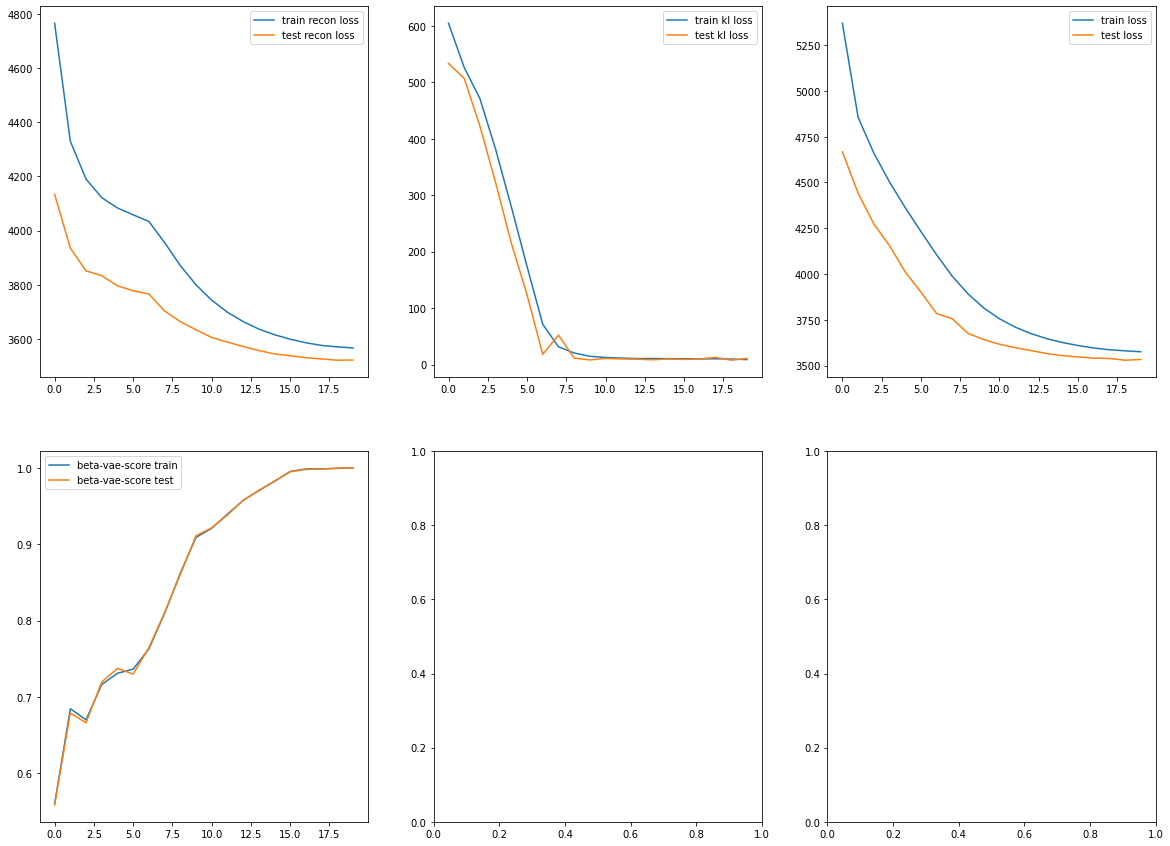

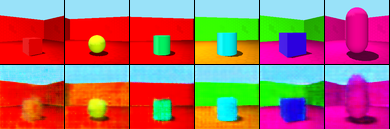

 50%|█████     | 20/40 [1:14:52<1:10:39, 211.97s/it, epoch_stat=20, global_iter=118125, kl_loss=8.68, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.56e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


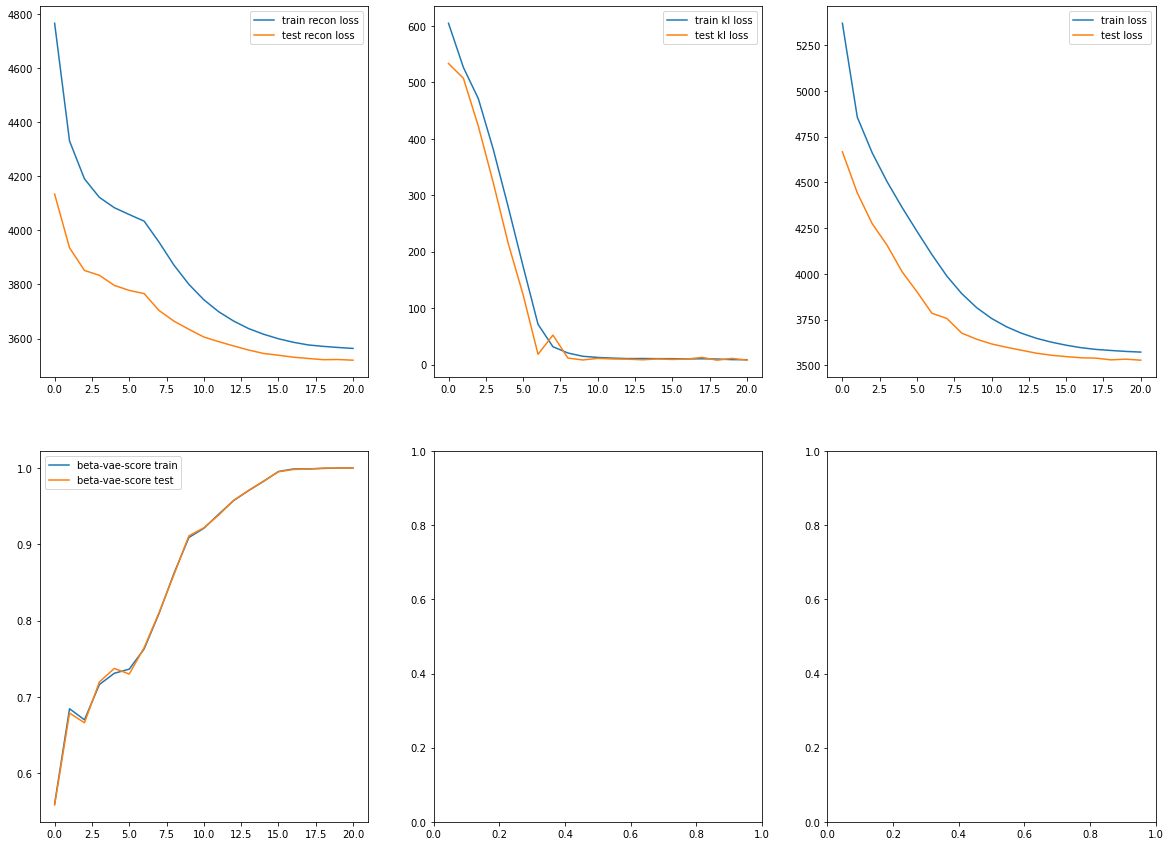

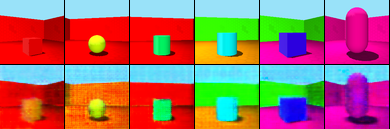

 52%|█████▎    | 21/40 [1:18:18<1:06:58, 211.48s/it, epoch_stat=21, global_iter=123750, kl_loss=8.18, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.56e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


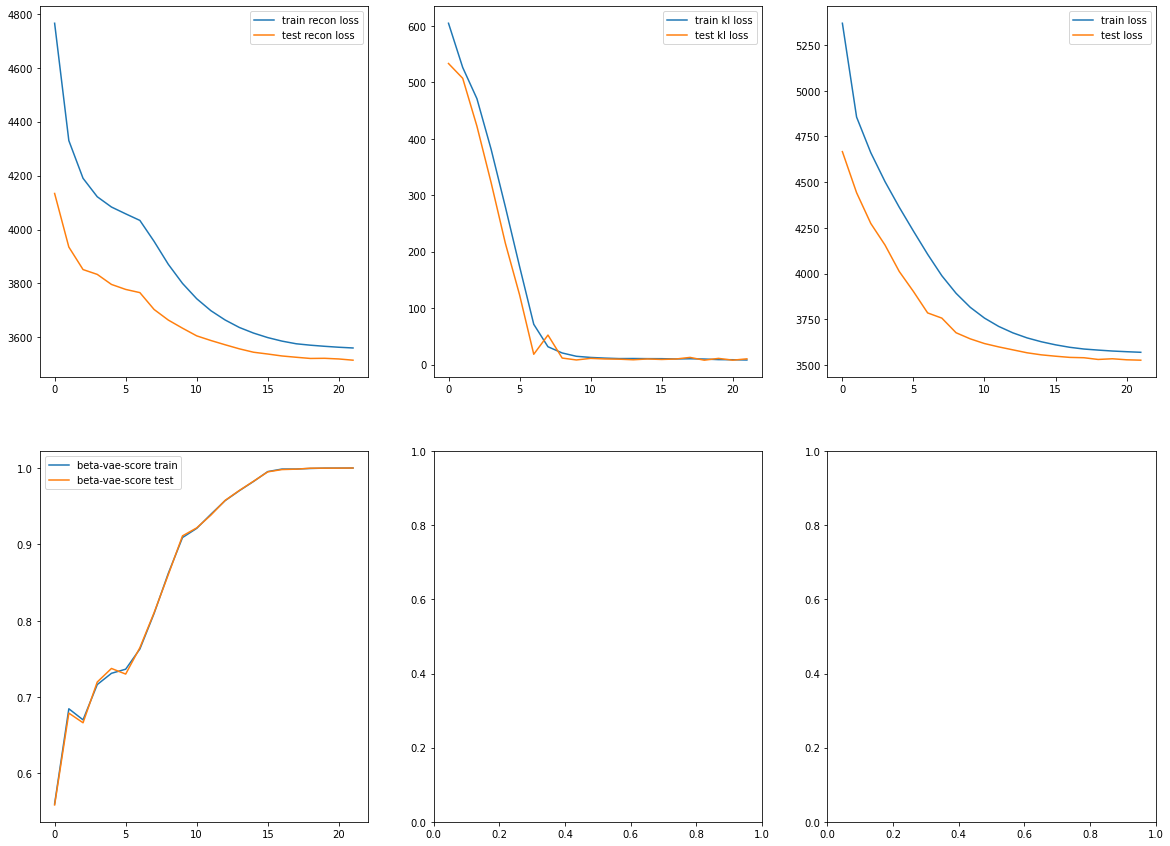

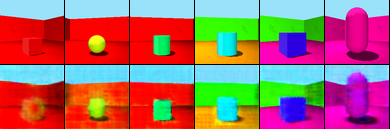

 55%|█████▌    | 22/40 [1:21:45<1:02:59, 209.97s/it, epoch_stat=22, global_iter=129375, kl_loss=7.98, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.56e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


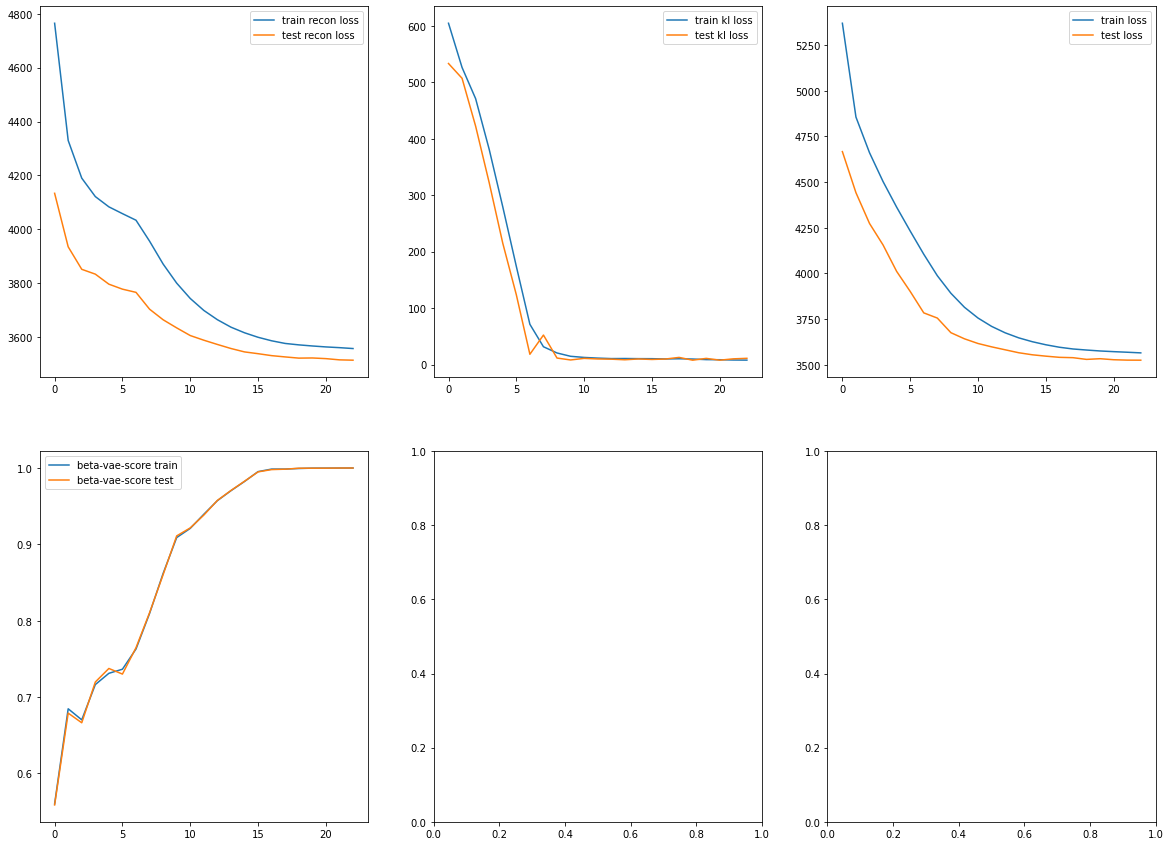

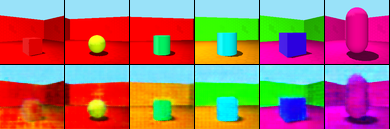

 57%|█████▊    | 23/40 [1:25:11<59:11, 208.91s/it, epoch_stat=23, global_iter=135000, kl_loss=7.47, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.56e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


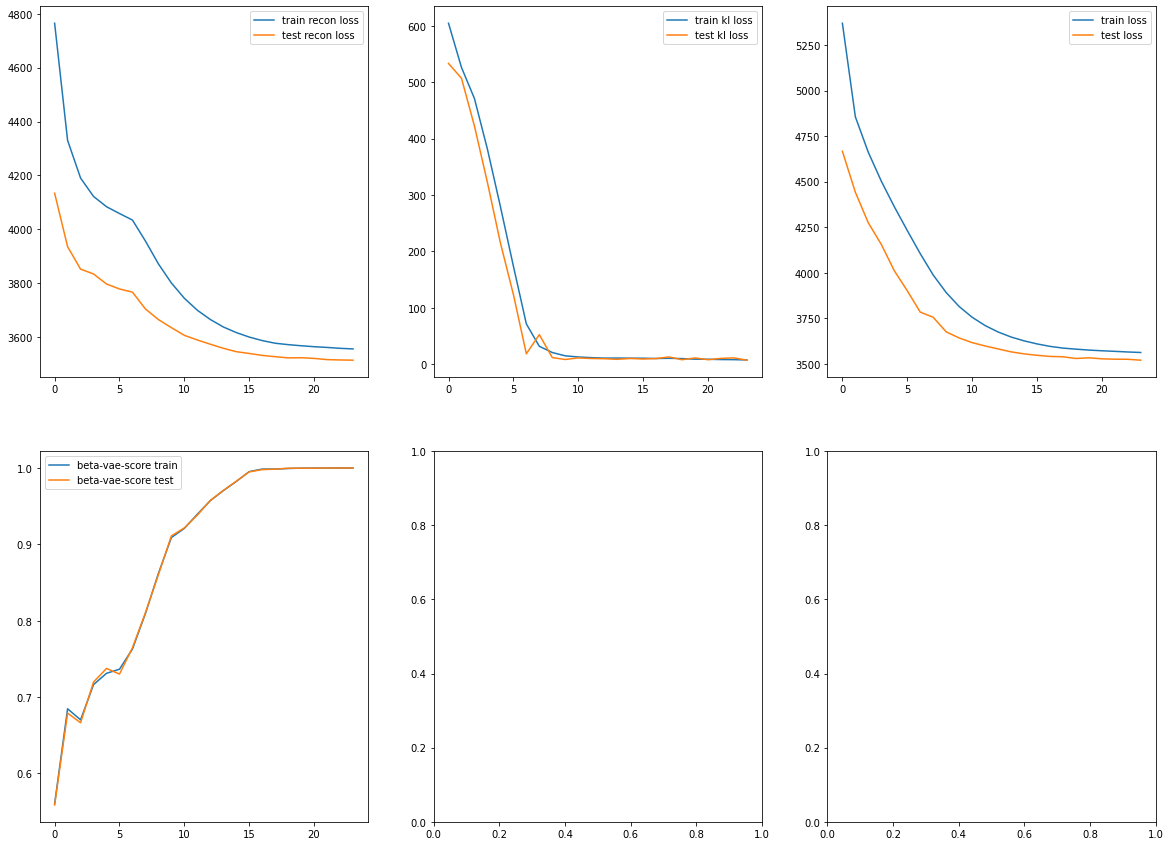

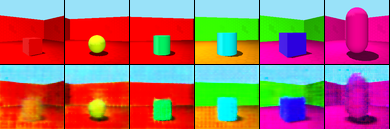

 60%|██████    | 24/40 [1:28:38<55:30, 208.14s/it, epoch_stat=24, global_iter=140625, kl_loss=7.32, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.55e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


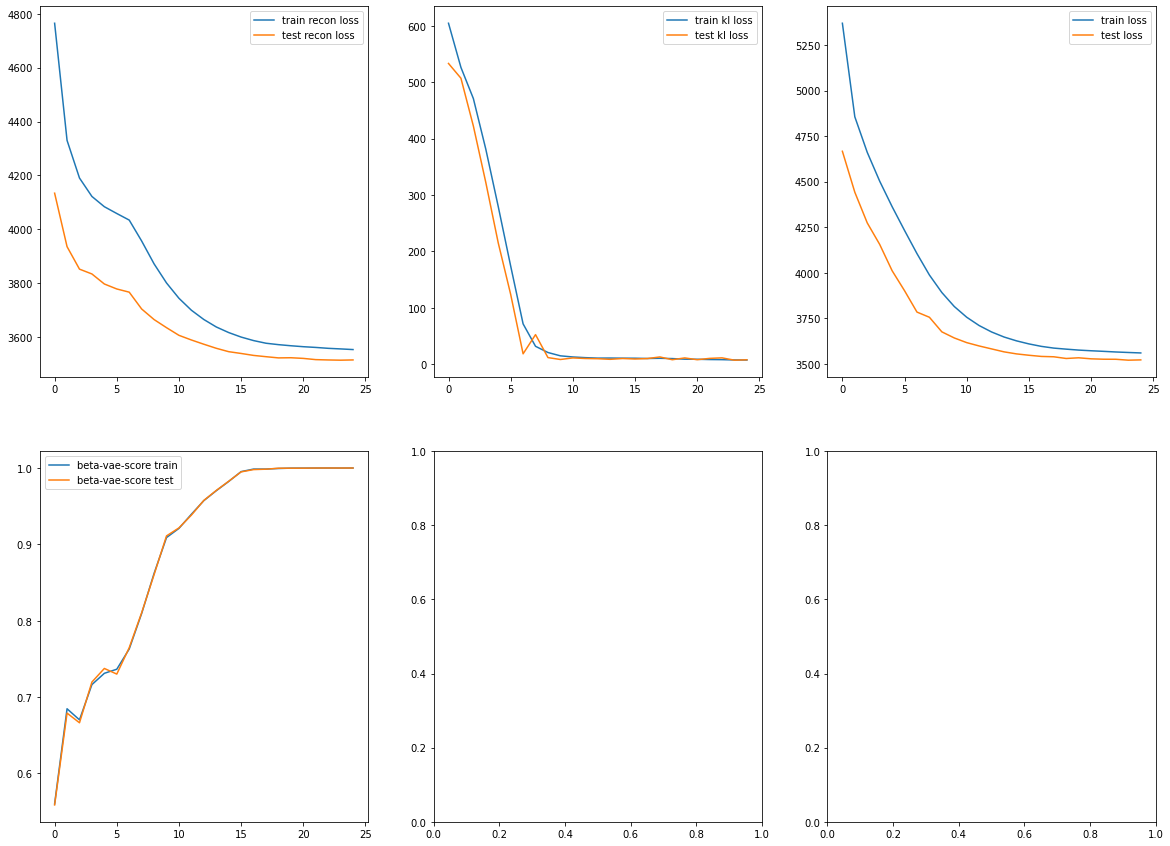

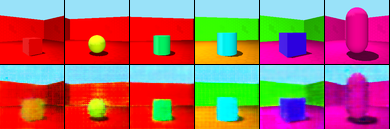

 62%|██████▎   | 25/40 [1:32:04<51:53, 207.59s/it, epoch_stat=25, global_iter=146250, kl_loss=7, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.55e+3]   C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


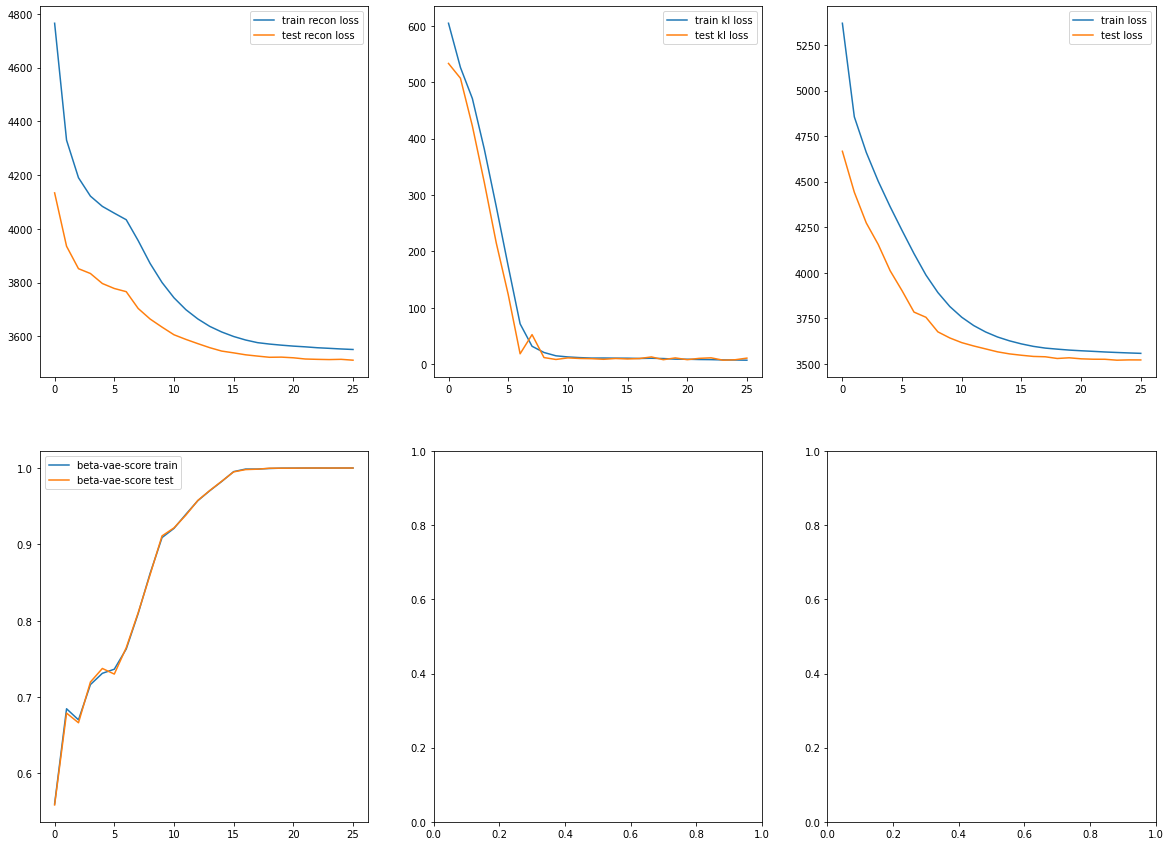

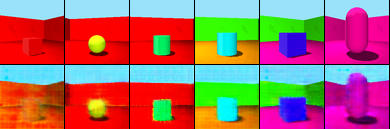

 65%|██████▌   | 26/40 [1:35:30<48:20, 207.16s/it, epoch_stat=26, global_iter=151875, kl_loss=6.56, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.55e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


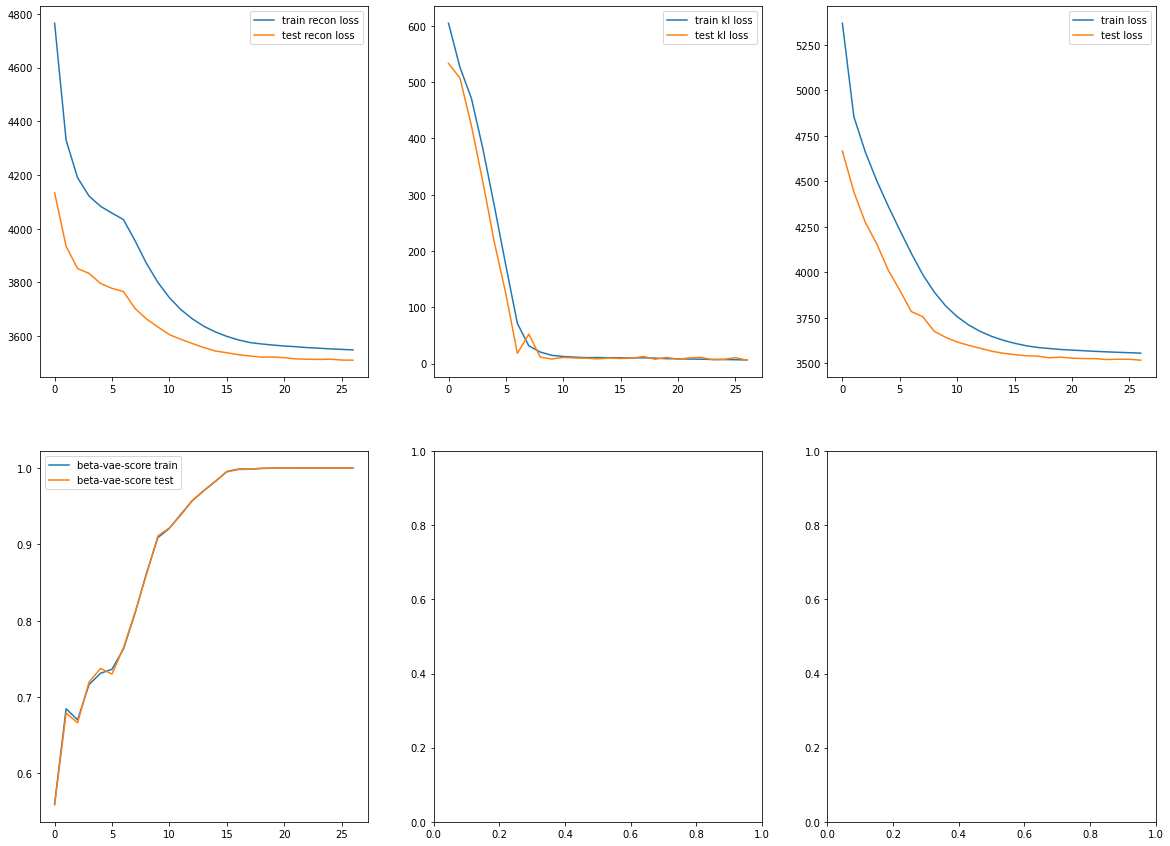

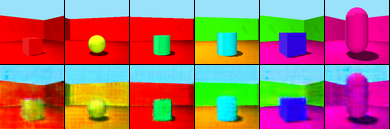

 68%|██████▊   | 27/40 [1:38:56<44:48, 206.83s/it, epoch_stat=27, global_iter=157500, kl_loss=6.3, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.55e+3] C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


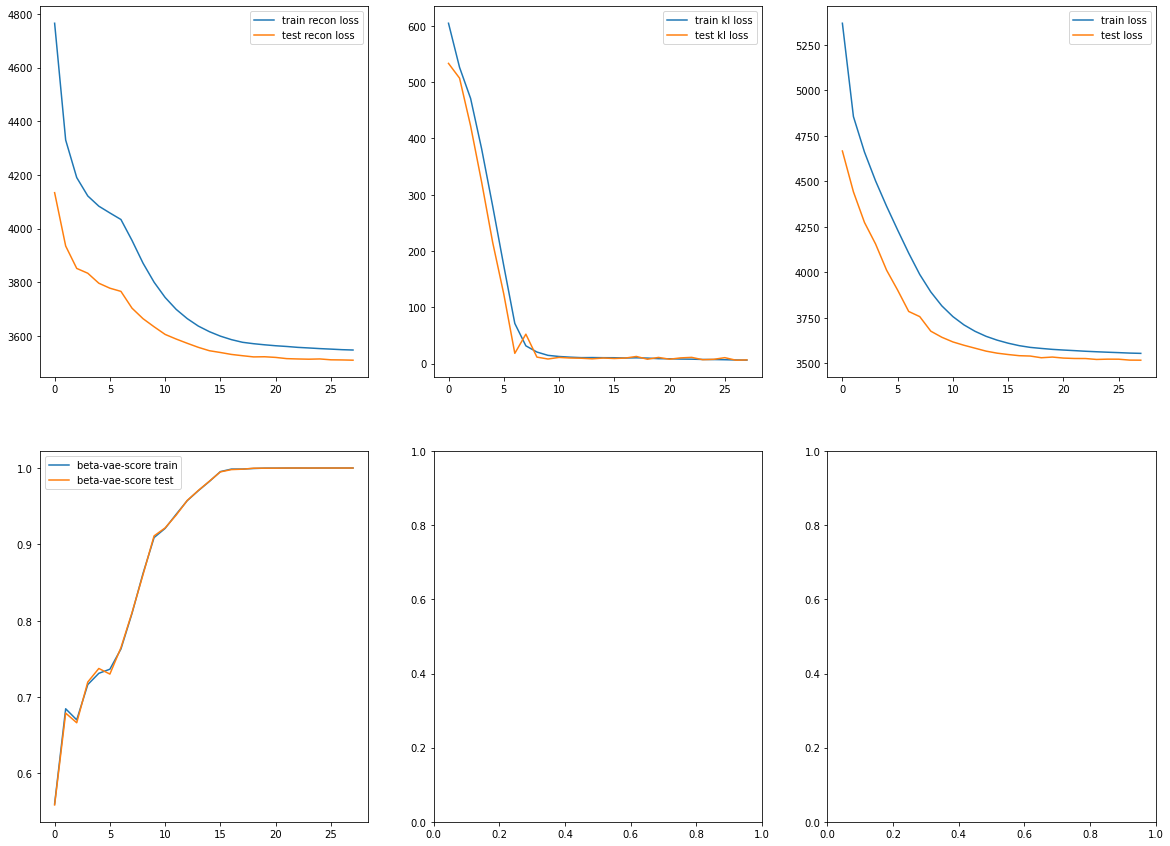

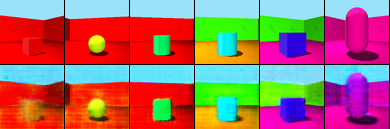

 70%|███████   | 28/40 [1:42:22<41:19, 206.60s/it, epoch_stat=28, global_iter=163125, kl_loss=6.11, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.55e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


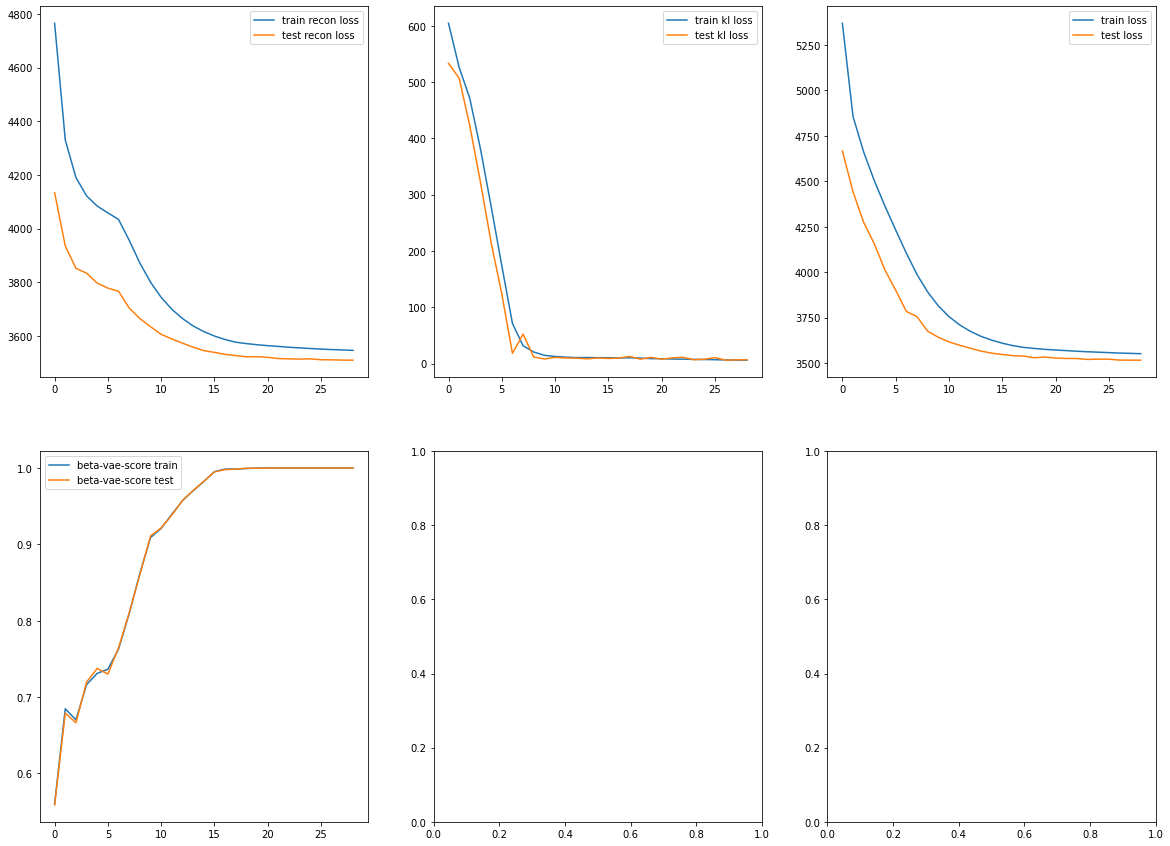

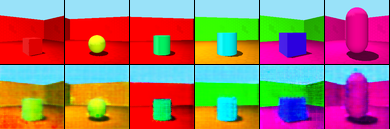

 72%|███████▎  | 29/40 [1:45:48<37:50, 206.45s/it, epoch_stat=29, global_iter=168750, kl_loss=6.08, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


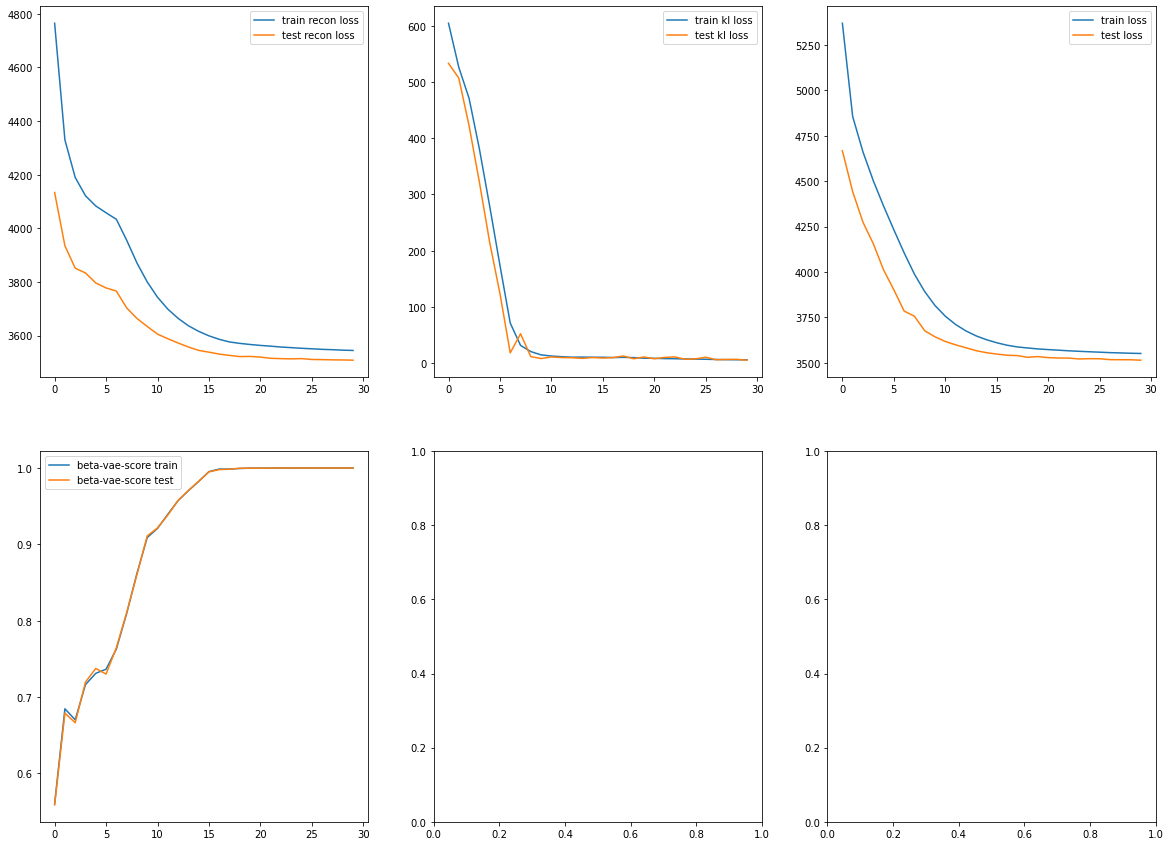

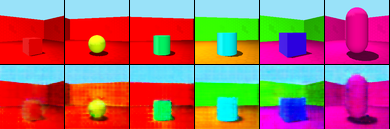

 75%|███████▌  | 30/40 [1:49:14<34:22, 206.30s/it, epoch_stat=30, global_iter=174375, kl_loss=5.79, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


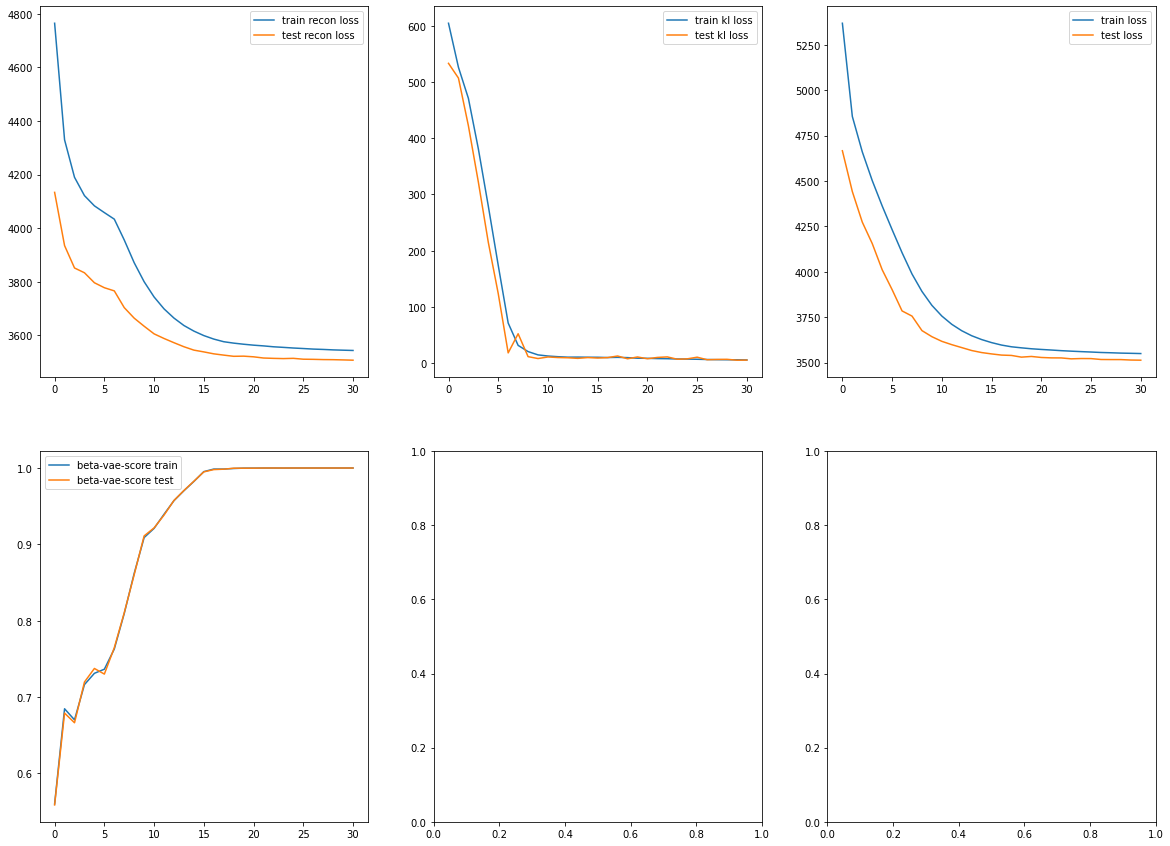

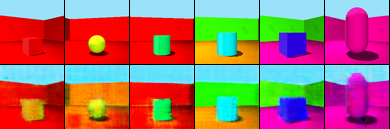

 78%|███████▊  | 31/40 [1:52:40<30:55, 206.20s/it, epoch_stat=31, global_iter=180000, kl_loss=5.71, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


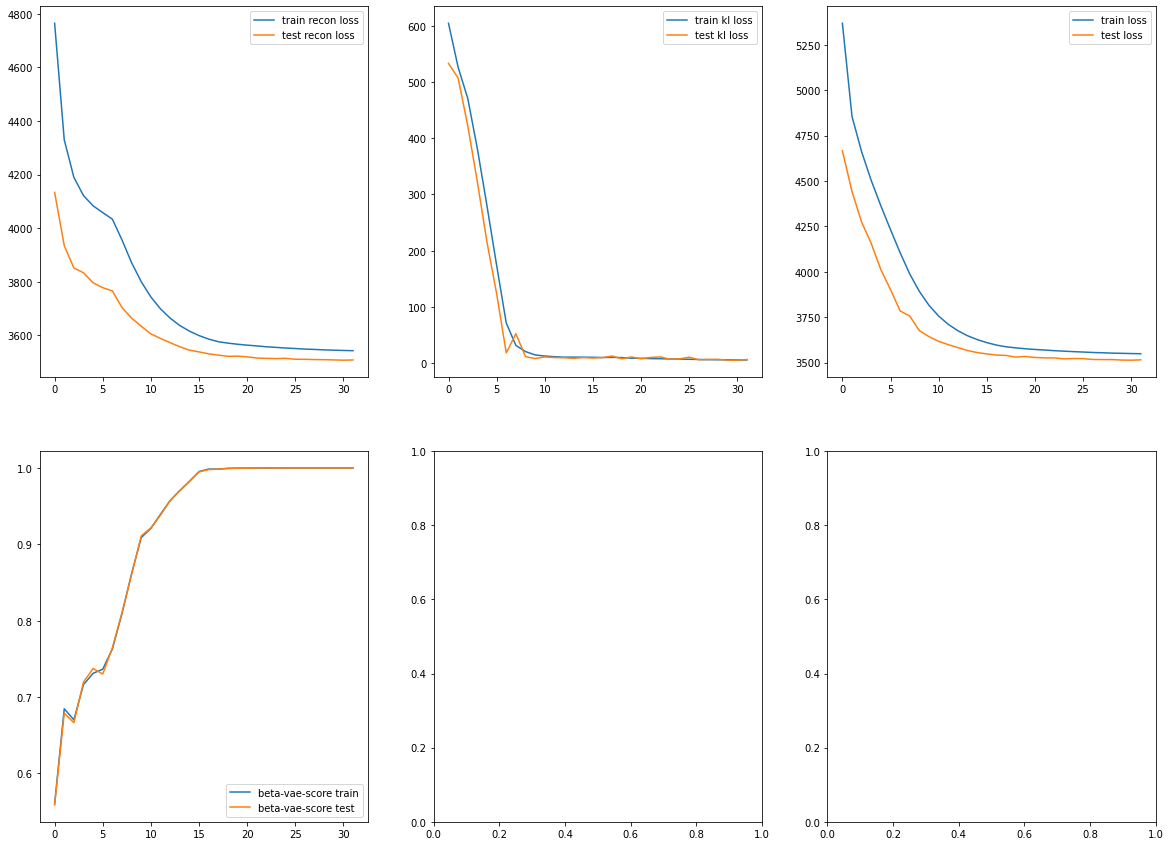

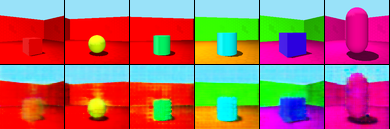

 80%|████████  | 32/40 [1:56:06<27:28, 206.05s/it, epoch_stat=32, global_iter=185625, kl_loss=5.66, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


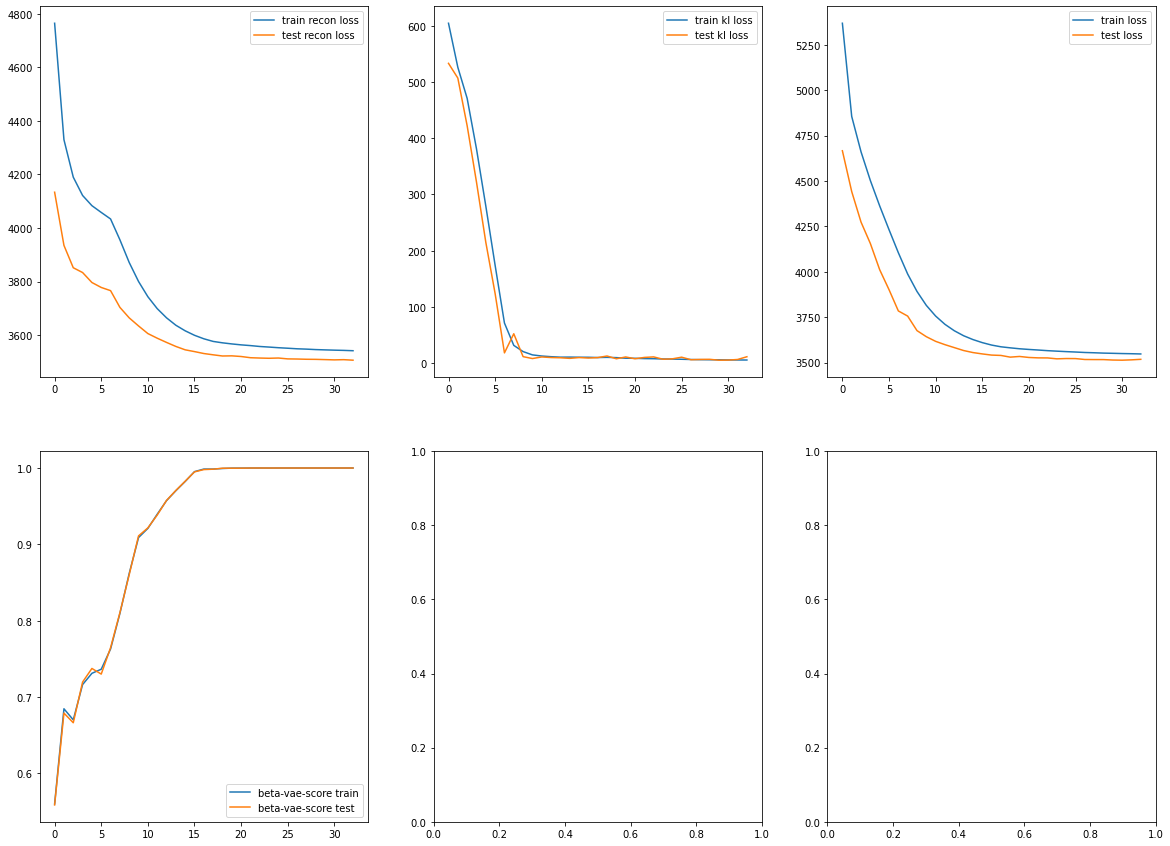

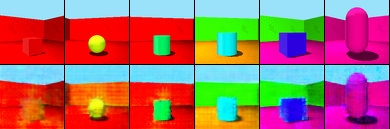

 82%|████████▎ | 33/40 [1:59:32<24:02, 206.01s/it, epoch_stat=33, global_iter=191250, kl_loss=5.5, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3] C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


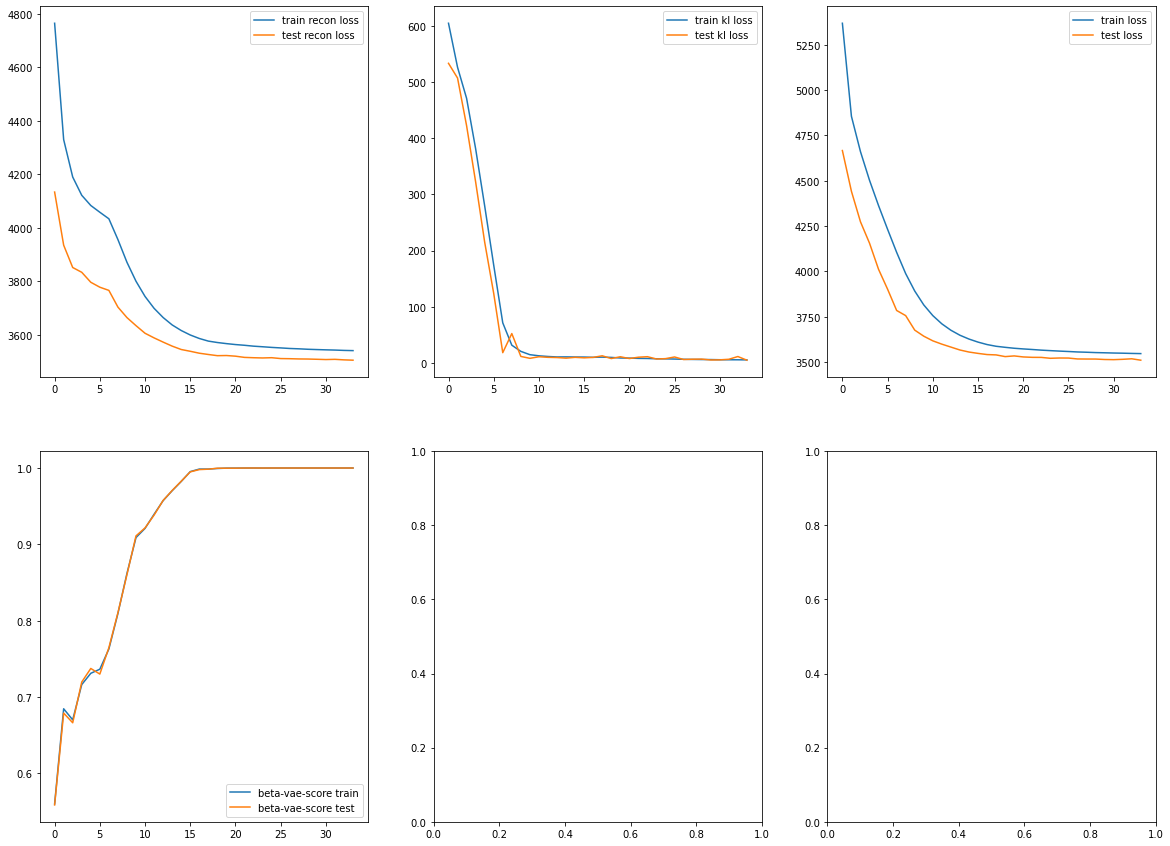

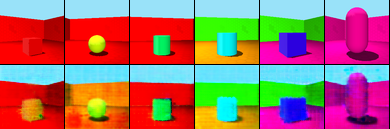

 85%|████████▌ | 34/40 [2:03:00<20:35, 205.95s/it, epoch_stat=34, global_iter=196875, kl_loss=5.61, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


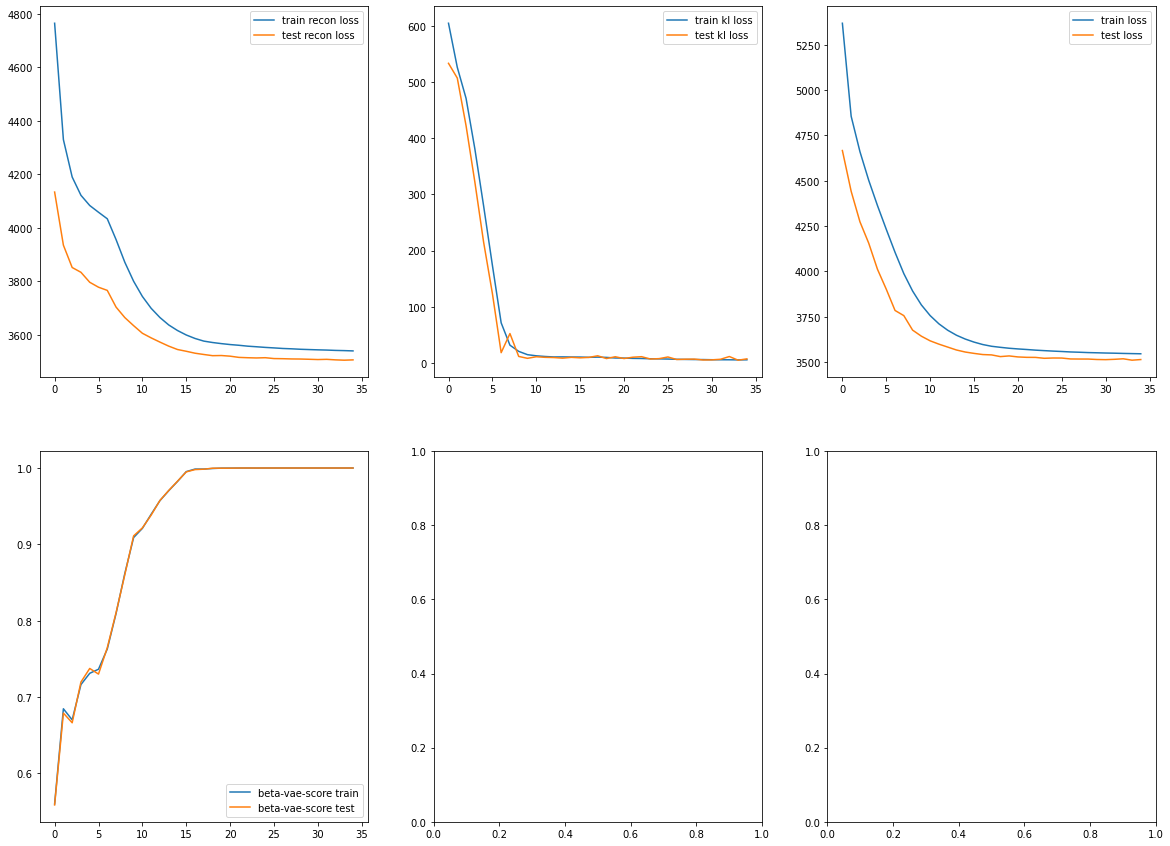

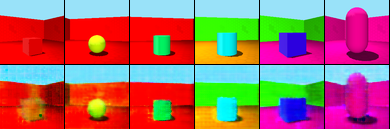

 88%|████████▊ | 35/40 [2:06:37<17:14, 206.88s/it, epoch_stat=35, global_iter=202500, kl_loss=5.57, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


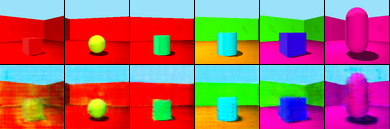

 90%|█████████ | 36/40 [2:10:15<14:00, 210.21s/it, epoch_stat=36, global_iter=208125, kl_loss=5.17, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


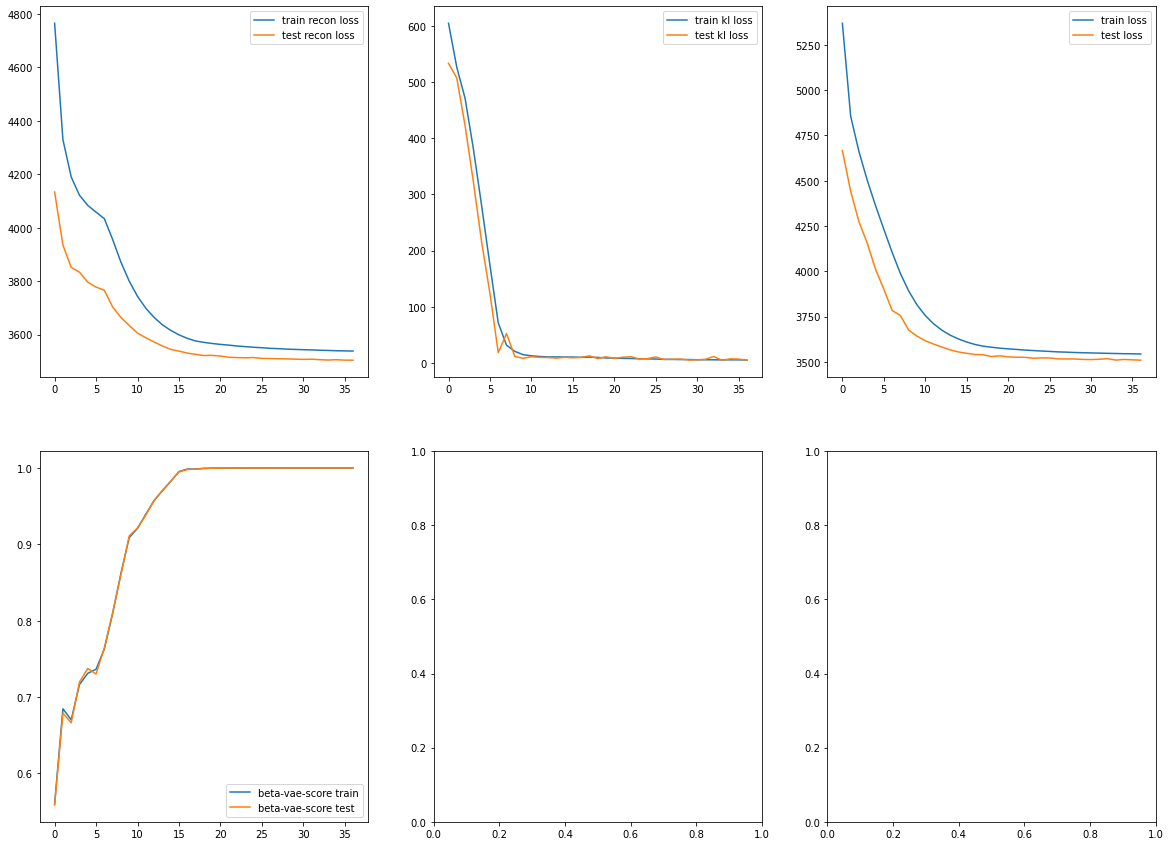

 92%|█████████▎| 37/40 [2:13:53<10:37, 212.39s/it, epoch_stat=37, global_iter=213750, kl_loss=5.06, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


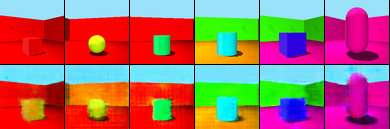

 95%|█████████▌| 38/40 [2:17:30<07:07, 213.89s/it, epoch_stat=38, global_iter=219375, kl_loss=5.27, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


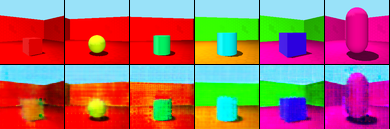

 98%|█████████▊| 39/40 [2:21:07<03:34, 214.87s/it, epoch_stat=39, global_iter=225000, kl_loss=5.17, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]C:\Users\szapl\miniconda3\envs\carla_disentanglement\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


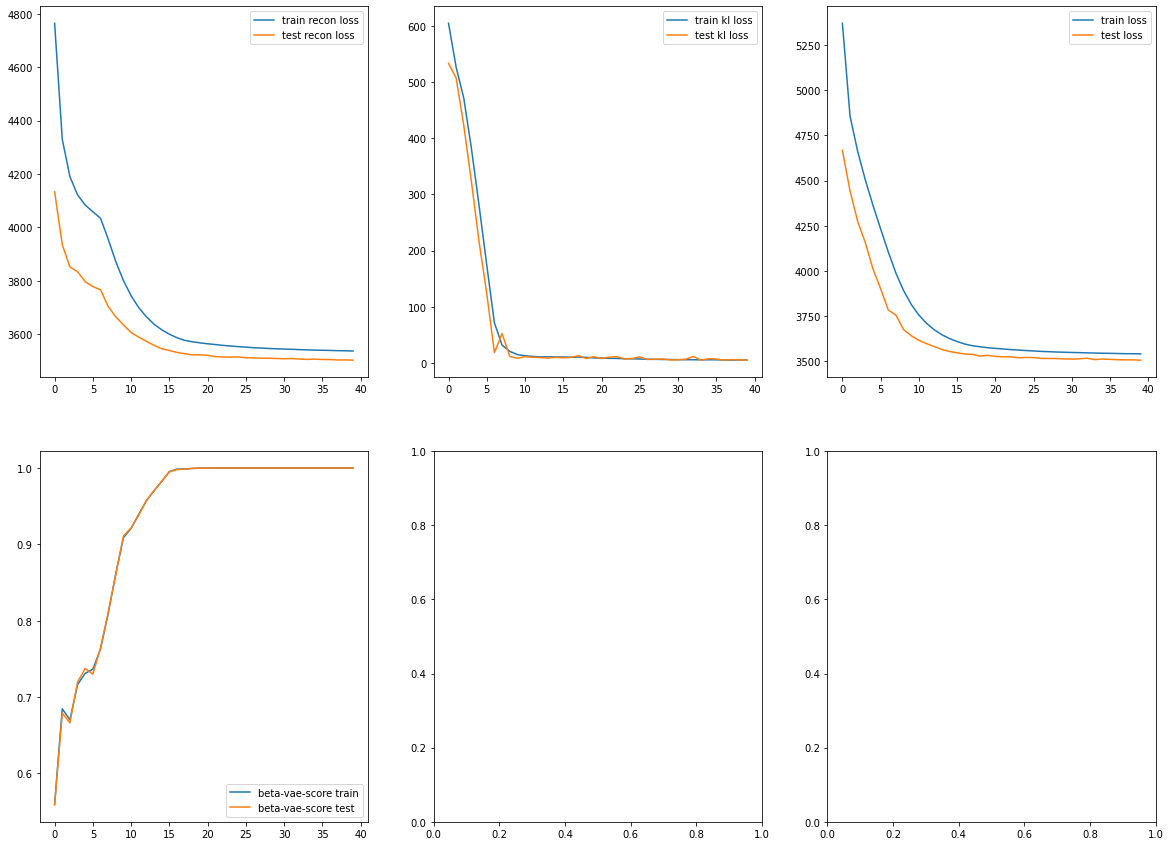

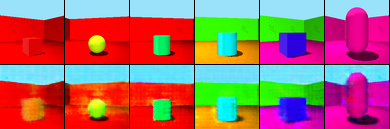

100%|██████████| 40/40 [2:21:42<00:00, 212.56s/it, epoch_stat=39, global_iter=225000, kl_loss=5.17, last_save=vae_20_2021-07-03_11-10-46_3572.2168.save, reconstruction_loss=3.54e+3]


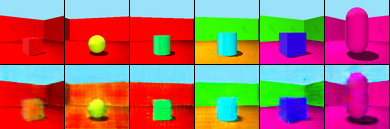

saved vae_2021-07-03_12-17-36_3541.74.save


In [8]:
vae.train(ds, epochs=40, max_iter=1.5e6, reconstruction_every=1, reconstruction_callback=display_image, loss_callback=addLoss, eval_every=1,eval_callback=addEval, batch_size=64, num_workers=0, reconstruct_indices=[0,1000,2000,65000,-30000,-1])

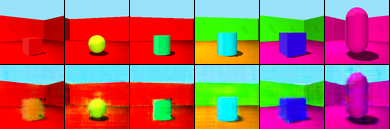

In [9]:
vae.visualize_reconstruction(ds, indices=[0,1000,2000,65000,-30000,-1]) 

In [10]:
vae.visualize_latents(ds, index=0)

'./viz/vae_2021-07-03_12-17-38.gif'

In [11]:
vae.visualize_latents(ds, index=-30000)

'./viz/vae_2021-07-03_12-17-39.gif'